In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
!pip install llnl-thicket

In [71]:
import sys
# sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
# sys.path.append("/scratch/group/csce435-f24/thicket")
sys.path.append("/thicket")
from glob import glob
from tabulate import tabulate

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

import os.path

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [72]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
input_size = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 2**28]
input_type = ["Sorted", "ReverseSorted", "Random", "1_perc_perturbed"]
measurement_regions = ['main', 'comp_large', 'comm']

In [73]:
tk = {}
for in_type in input_type:
    tk[in_type] = th.Thicket.from_caliperreader(glob("/content/drive/MyDrive/Colab Notebooks/project1/cali/*-s{}-sampl1.cali".format(in_type)))

(2/2) Creating Thicket: 100%|██████████| 5/5 [00:00<00:00, 346.98it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)
(2/2) Creating Thicket: 100%|██████████| 6/6 [00:00<00:00, 267.41it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change

View Calltree

In [74]:
# Not very useful if counting from multiple cali files:
#print(tk.tree(metric_column="Avg time/rank"))

In [75]:
#tk.metadata.columns

In [76]:
#tk.metadata.head(1)

In [77]:
for node in tk['Random'].graph.traverse():
    print(node)

{'name': 'main', 'type': 'function'}
{'name': 'MPI_Barrier', 'type': 'function'}
{'name': 'MPI_Comm_dup', 'type': 'function'}
{'name': 'MPI_Finalize', 'type': 'function'}
{'name': 'MPI_Finalized', 'type': 'function'}
{'name': 'MPI_Init', 'type': 'function'}
{'name': 'MPI_Initialized', 'type': 'function'}
{'name': 'comm', 'type': 'function'}
{'name': 'comm_large', 'type': 'function'}
{'name': 'MPI_Recv', 'type': 'function'}
{'name': 'MPI_Send', 'type': 'function'}
{'name': 'comm_small', 'type': 'function'}
{'name': 'MPI_Recv', 'type': 'function'}
{'name': 'MPI_Send', 'type': 'function'}
{'name': 'comp', 'type': 'function'}
{'name': 'comp_large', 'type': 'function'}
{'name': 'comp_small', 'type': 'function'}
{'name': 'correctness_check', 'type': 'function'}
{'name': 'MPI_Recv', 'type': 'function'}
{'name': 'MPI_Send', 'type': 'function'}
{'name': 'data_init_runtime', 'type': 'function'}


In [78]:
tk['Random'].dataframe

nid  \
node                                              profile            
{'name': 'main', 'type': 'function'}              374863897    1.0   
                                                  911771950    1.0   
                                                  1063241356   1.0   
                                                  2255285000   1.0   
                                                  3165004814   1.0   
                                                  3324517272   1.0   
                                                  4045716276   1.0   
{'name': 'MPI_Barrier', 'type': 'function'}       374863897   11.0   
                                                  911771950   11.0   
                                                  1063241356  11.0   
                                                  2255285000  11.0   
                                                  3165004814  11.0   
                                                  3324517272  11.0   
                                                  4045716276  11.0   
{'name': 'MPI_Comm_dup', 'type': 'function'}      374863897   21.0   
                                                  911771950   21.0   
                                                  1063241356  21.0   
                                                  2255285000  21.0   
                                                  3165004814  21.0   
                                                  3324517272  21.0   
                                                  4045716276  21.0   
{'name': 'MPI_Finalize', 'type': 'function'}      374863897   18.0   
                                                  911771950   18.0   
                                                  1063241356  18.0   
                                                  2255285000  18.0   
                                                  3165004814  18.0   
                                                  3324517272  18.0   
                                                  4045716276  18.0   
{'name': 'MPI_Finalized', 'type': 'function'}     374863897   20.0   
                                                  911771950   20.0   
                                                  1063241356  20.0   
                                                  2255285000  20.0   
                                                  3165004814  20.0   
                                                  3324517272  20.0   
                                                  4045716276  20.0   
{'name': 'MPI_Init', 'type': 'function'}          374863897    2.0   
                                                  911771950    2.0   
                                                  1063241356   2.0   
                                                  2255285000   2.0   
                                                  3165004814   2.0   
                                                  3324517272   2.0   
                                                  4045716276   2.0   
{'name': 'MPI_Initialized', 'type': 'function'}   374863897   19.0   
                                                  911771950   19.0   
                                                  1063241356  19.0   
                                                  2255285000  19.0   
                                                  3165004814  19.0   
                                                  3324517272  19.0   
                                                  4045716276  19.0   
{'name': 'comm', 'type': 'function'}              374863897    6.0   
                                                  911771950    6.0   
                                                  1063241356   6.0   
                                                  2255285000   6.0   
                                                  3165004814   6.0   
                                                  3324517272   6.0   
                                                  4045716276   6.0   
{'n

Group Performance data by `input_size` in the Thicket metadata table.

In [79]:
for in_type in tk:
    tk[in_type].metadata_column_to_perfdata("num_procs")
    tk[in_type].metadata_column_to_perfdata("input_size")
    #tk.metadata_column_to_perfdata("input_type")

    tk[in_type].dataframe = tk[in_type].dataframe.reset_index().set_index(["node", "num_procs", "input_size"]).sort_index()

    #tk.dataframe.head()

In [80]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [81]:
#tk.dataframe.head(25)

In [82]:
#define function for graphing in matplotlib:
def show_mpl_plot(fig, ax, title, xlabel, ylabel, legend):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(legend)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/project1/Sample_Plots/{title}')
    plt.show()
    return fig, ax


def plot_mpl(df, title, xlabel, ylabel, legend, y_lim=0):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    if (y_lim != 0):
      plt.ylim(0, y_lim)

    return show_mpl_plot(fig, ax, title, xlabel, ylabel, legend)


### For each implementation:
- For each of comp_large, comm, and main:
    - Strong scaling plots for each input_size with lines for input_type (7
    plots - 4 lines each)
    - Strong scaling speedup plot for each input_type (4 plots)
    - Weak scaling plots for each input_type (4 plots)

- in Radix Sort case, chose to forgo and only have the 6 plots as last problem size would exceed 6 hours (not ideal)


Merge sort will have $3 \cdot (7 + 4 + 4) = 45$ plots.
(However, at the time of writing, Grace has a network error that prevents `p=1024` jobs from running. Thus, 18 `p=1024` Caliper files are still missing.)

### Strong Scaling
- fixed problem size while increasing number of processors/nodes

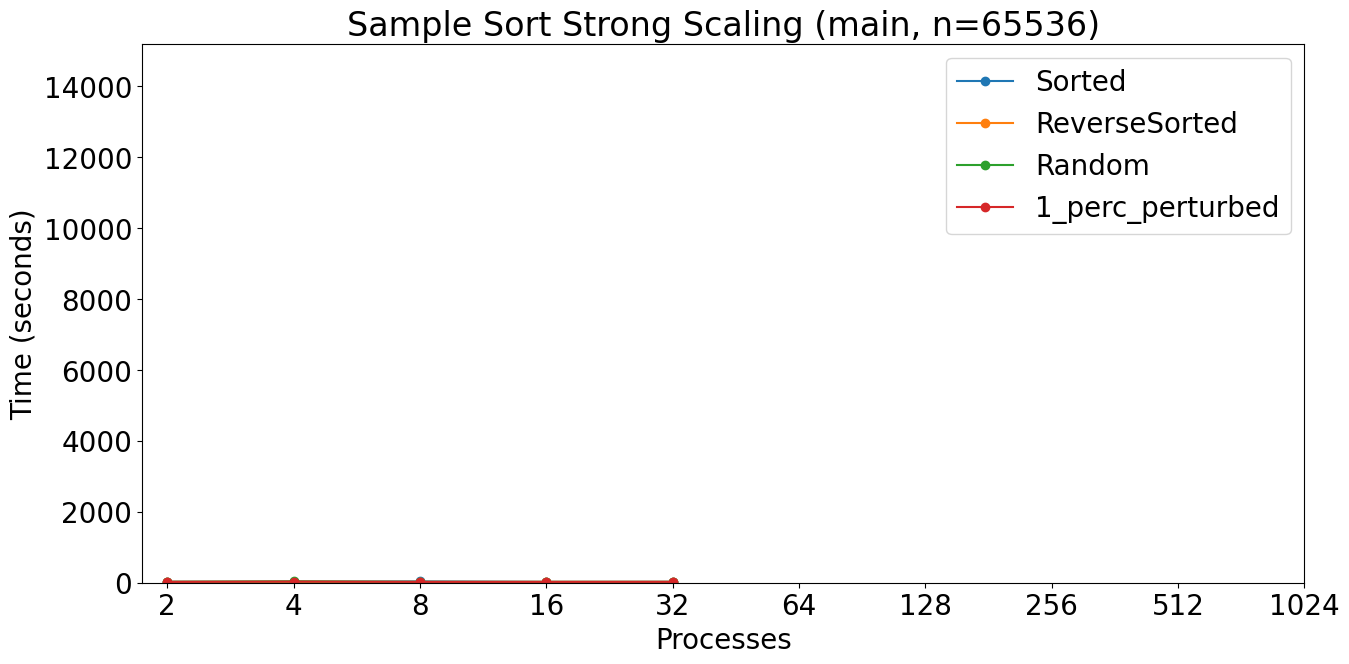

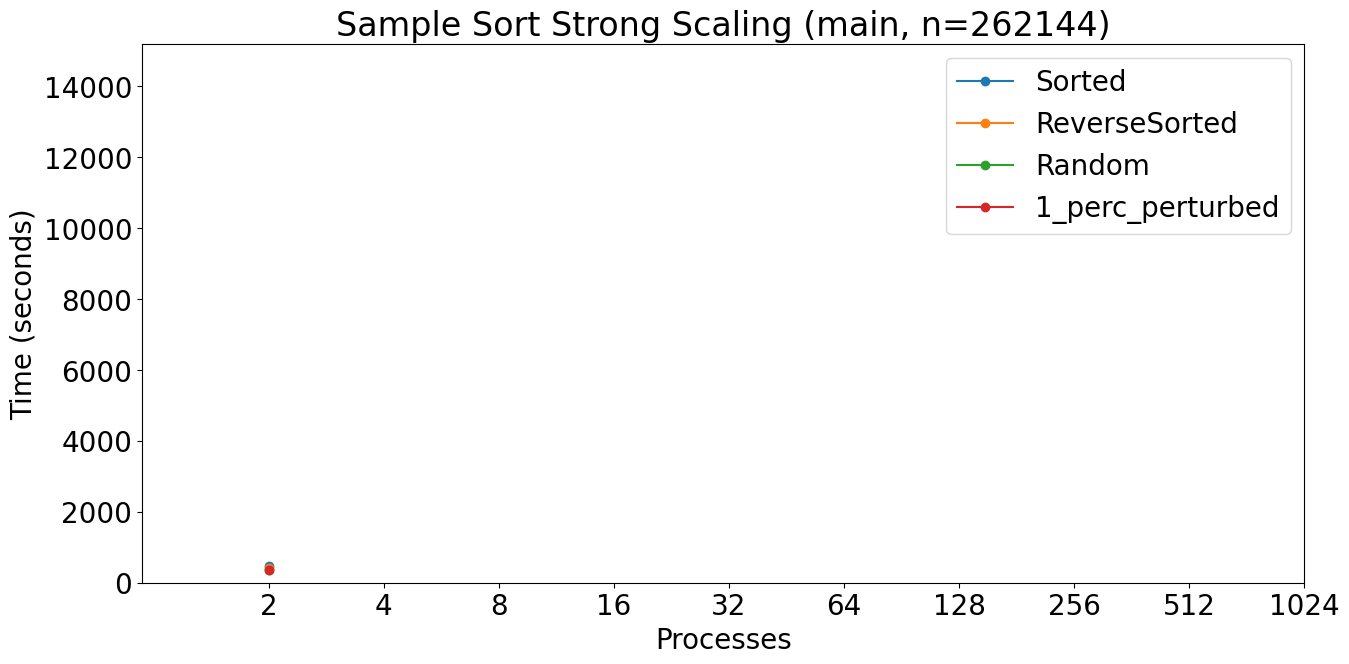

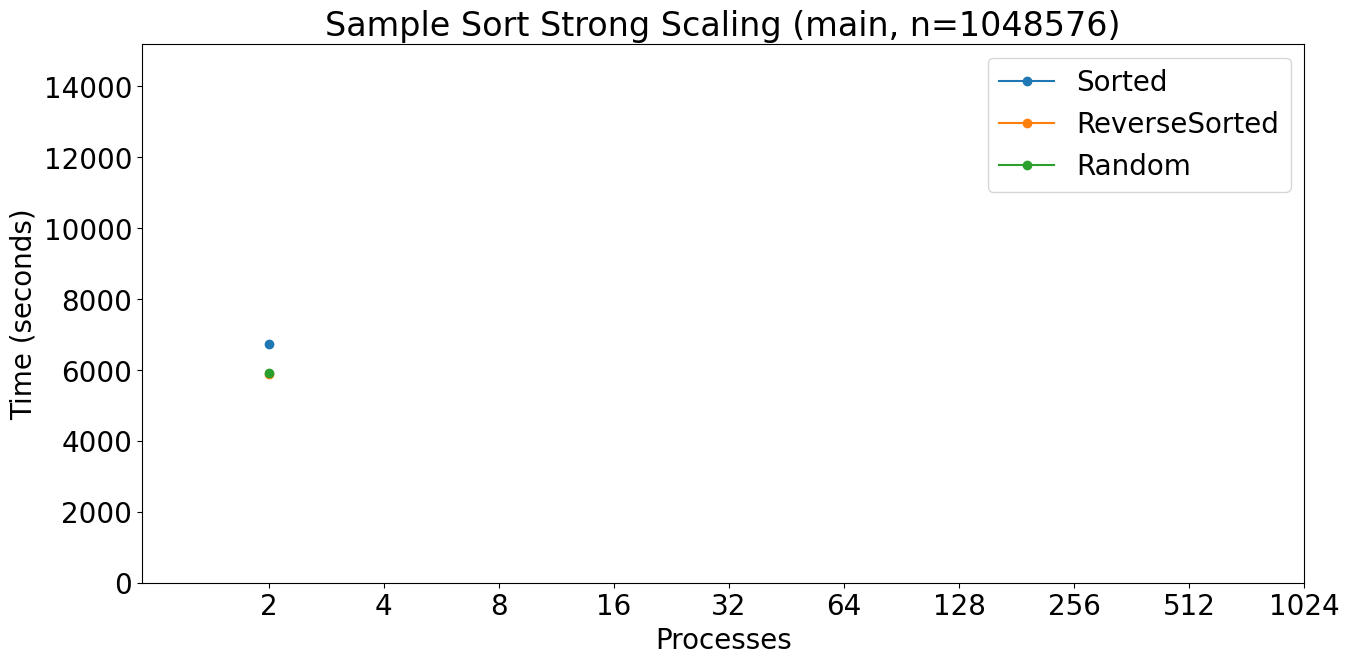

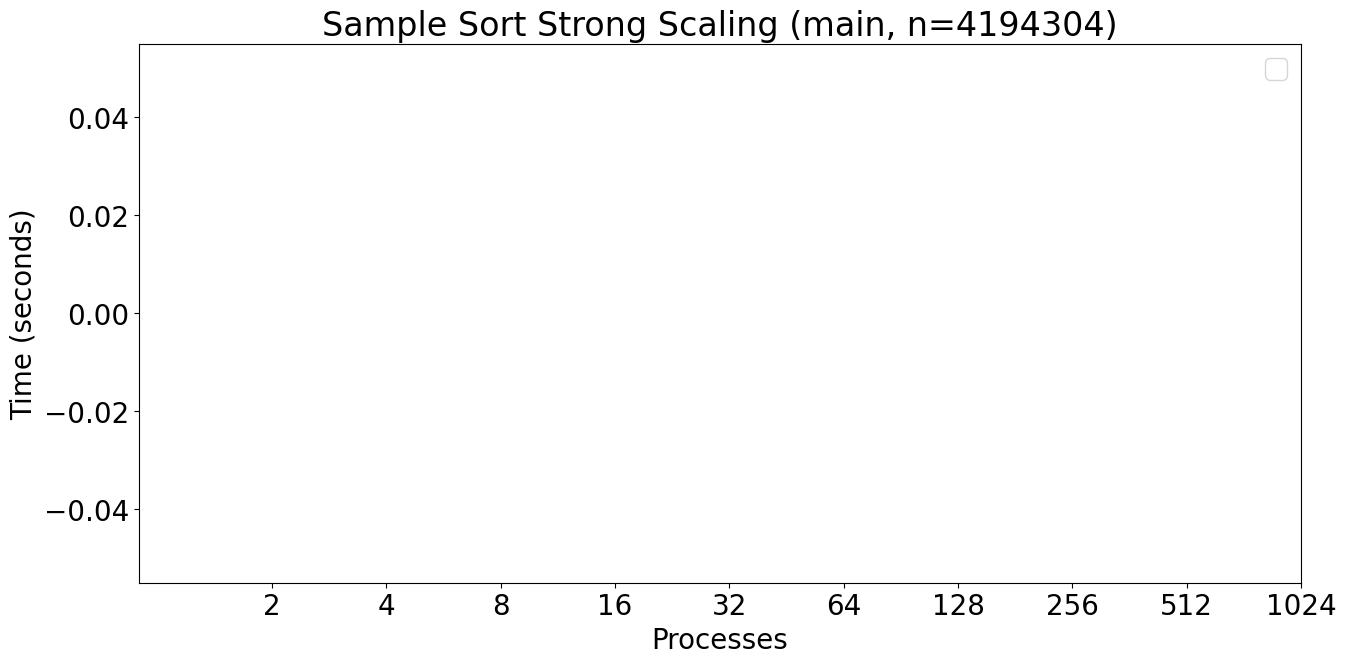

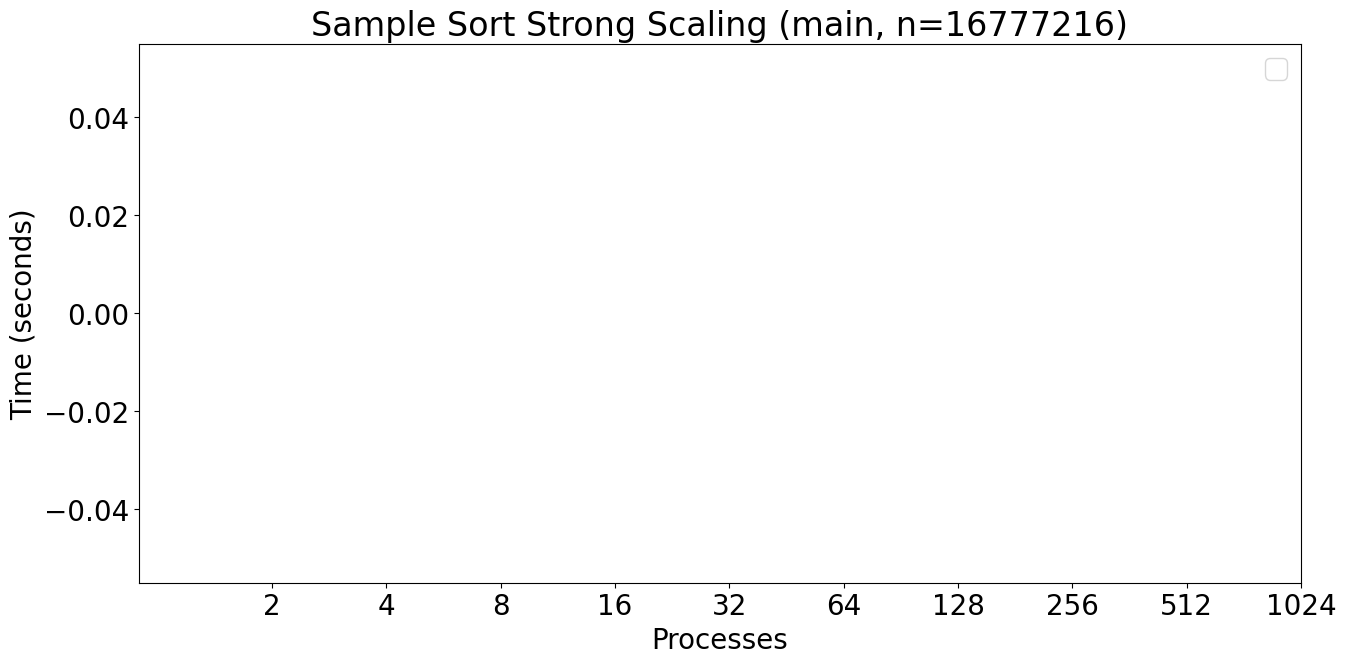

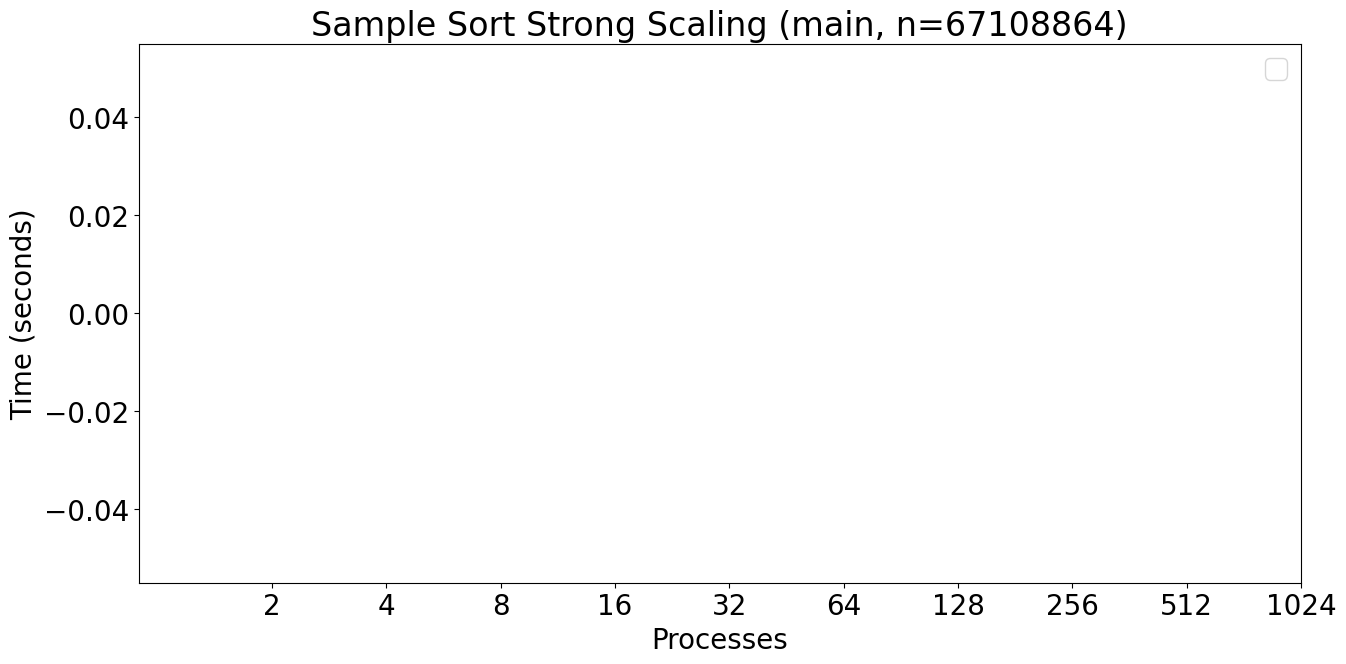

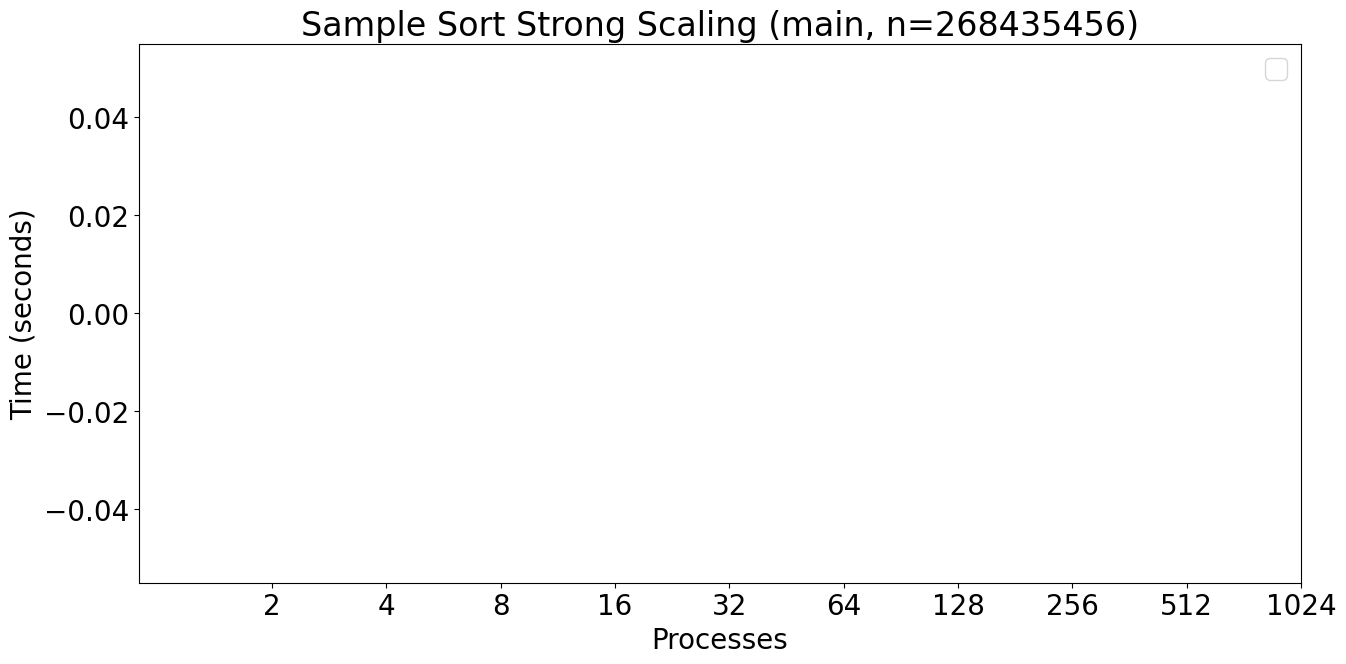

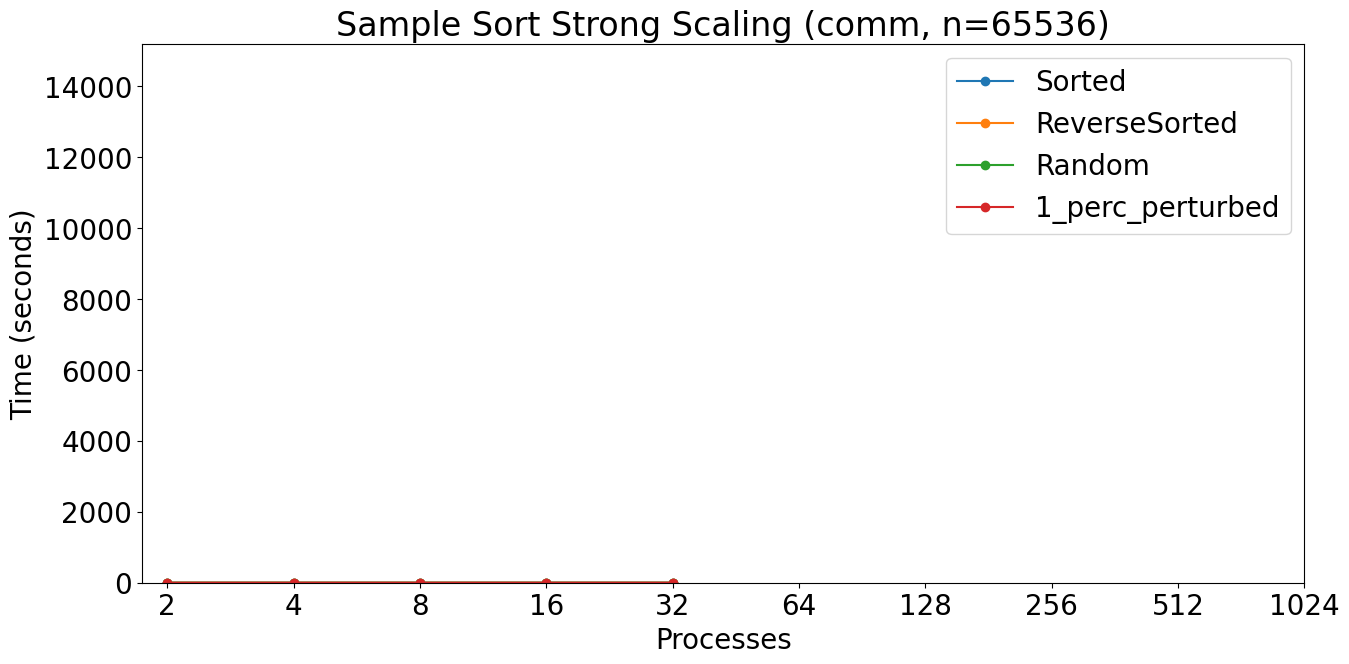

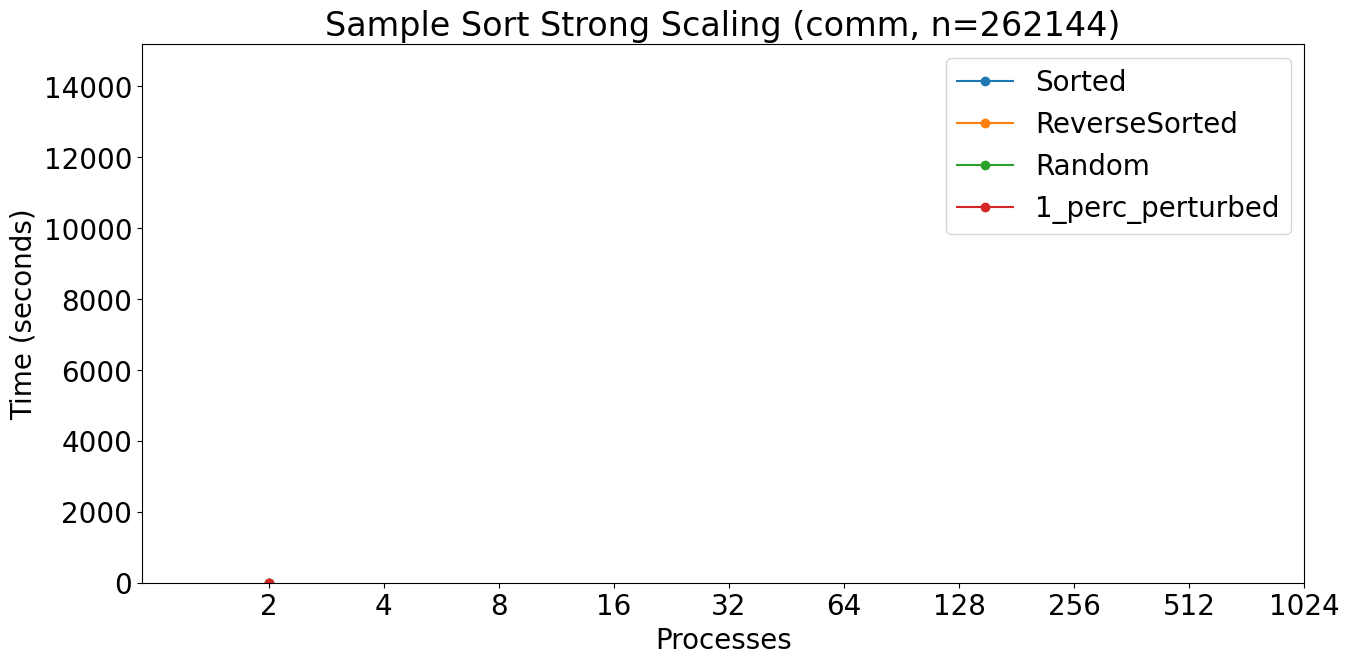

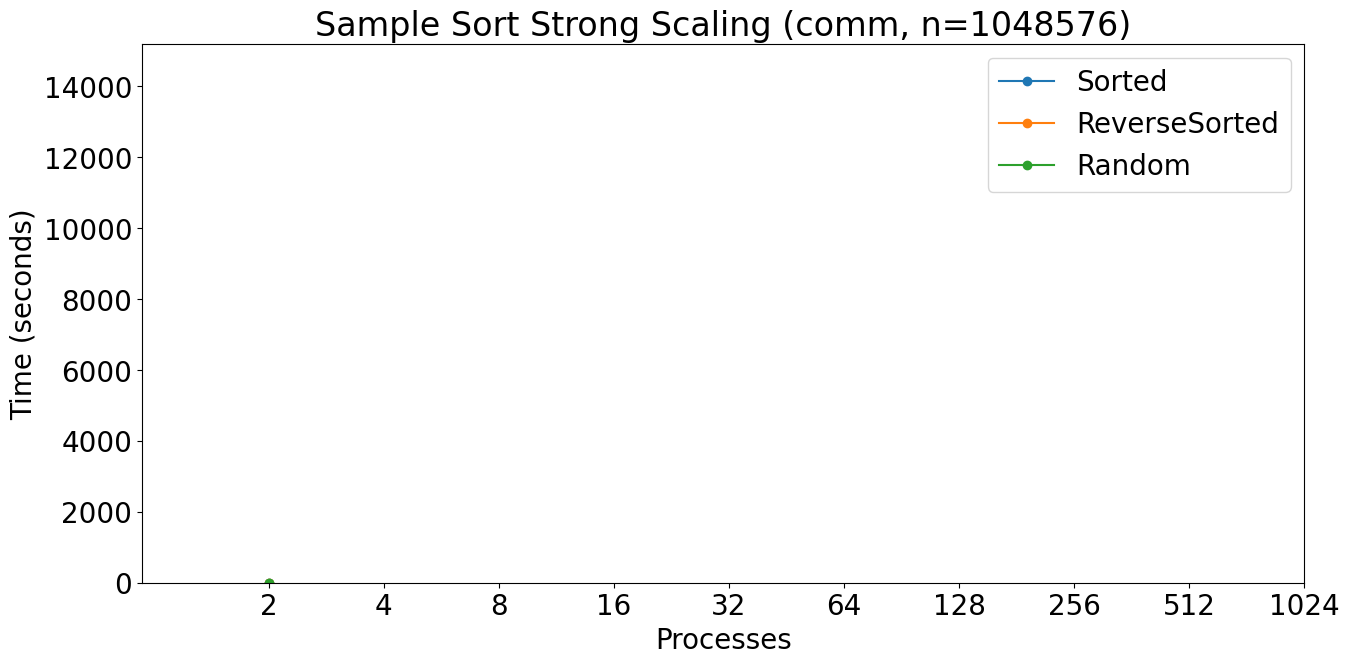

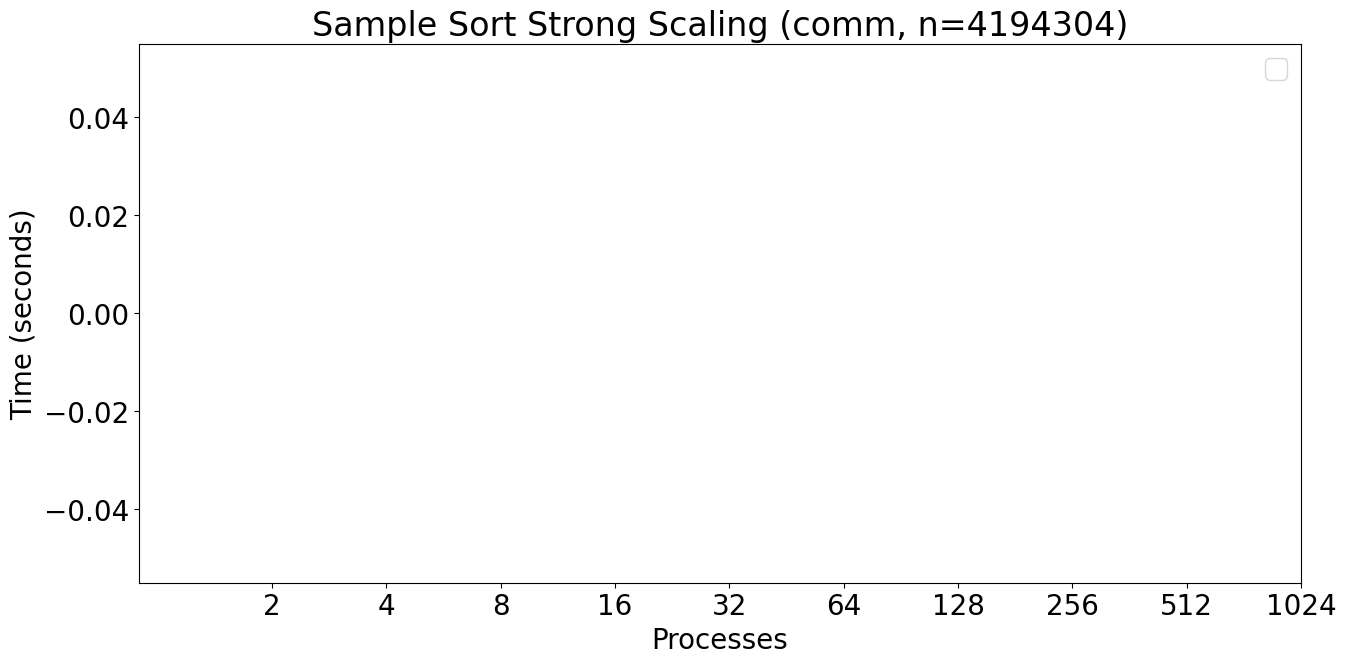

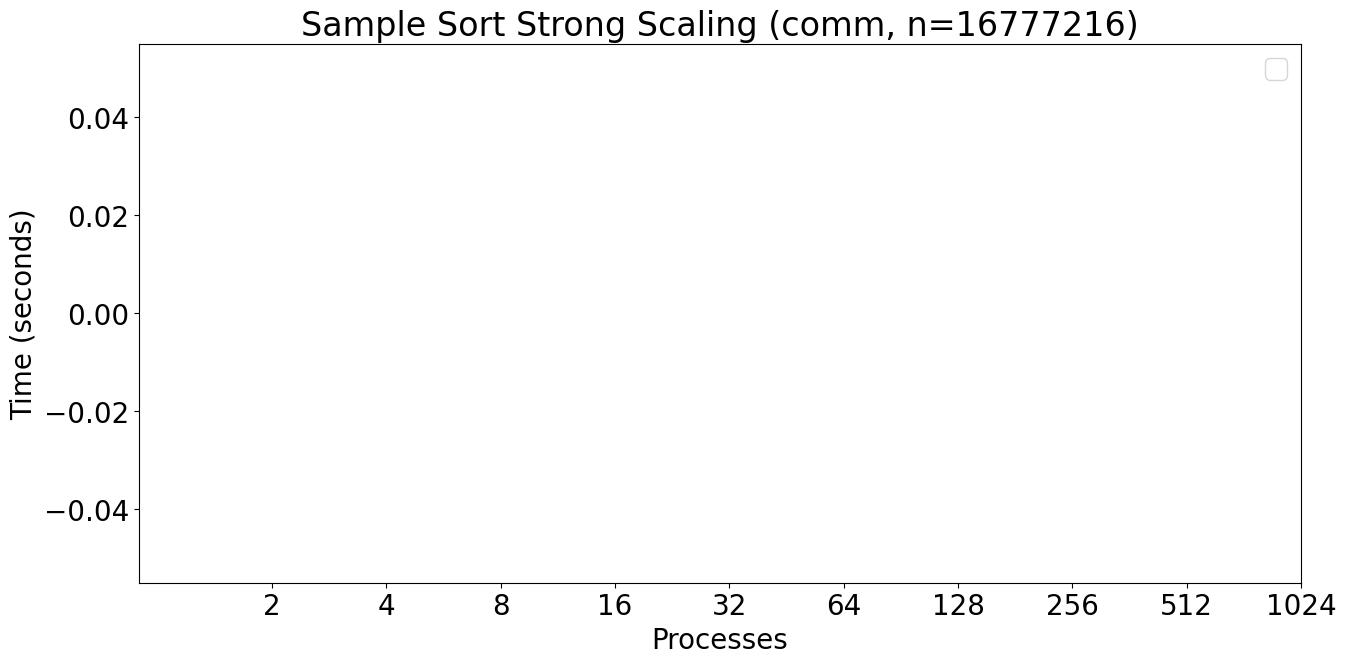

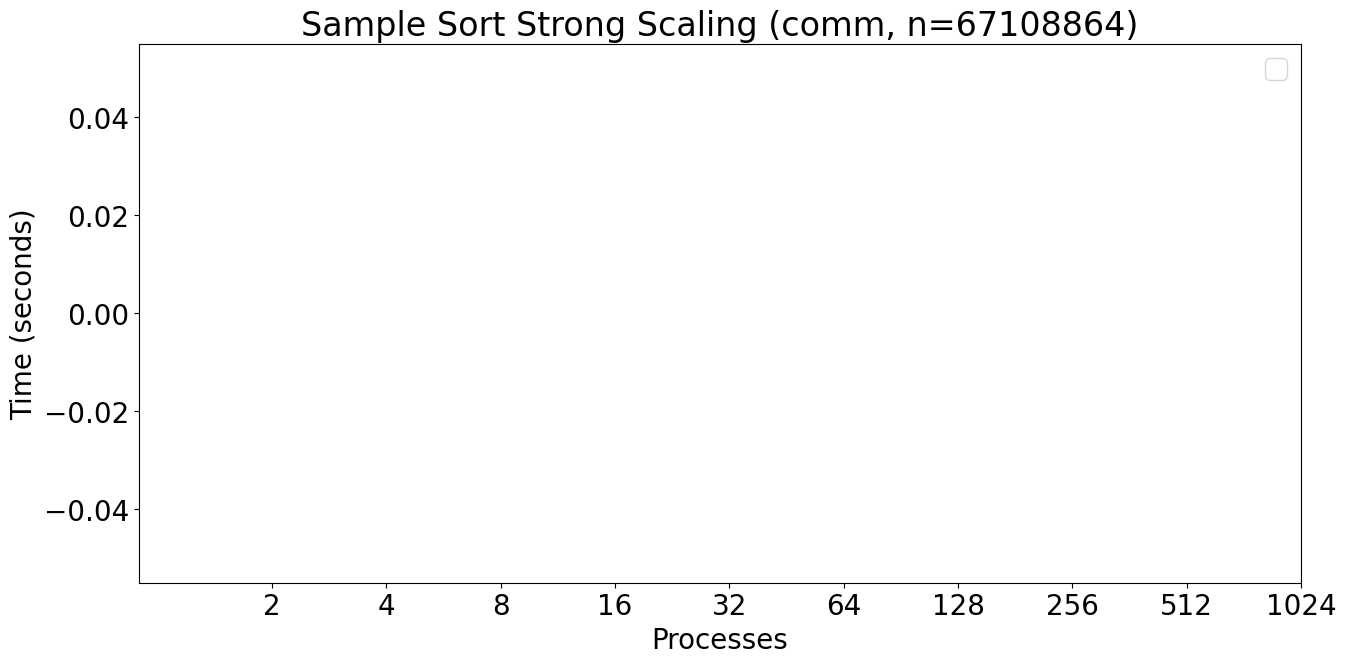

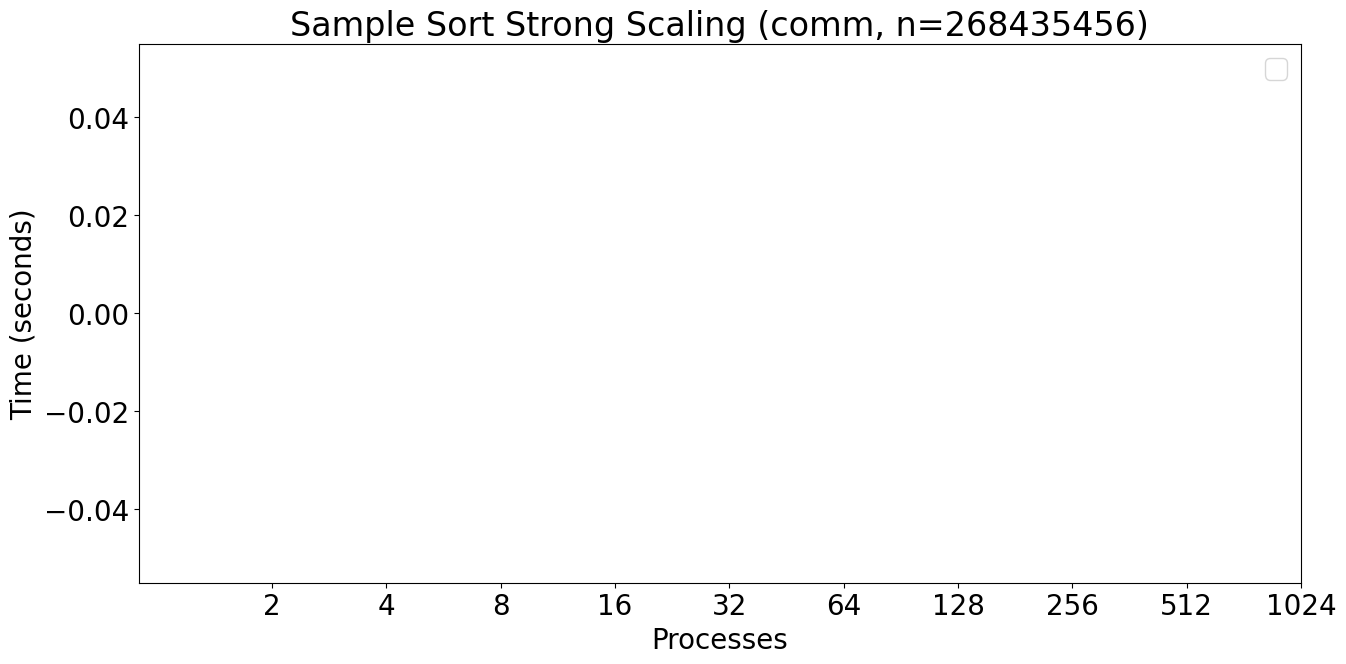

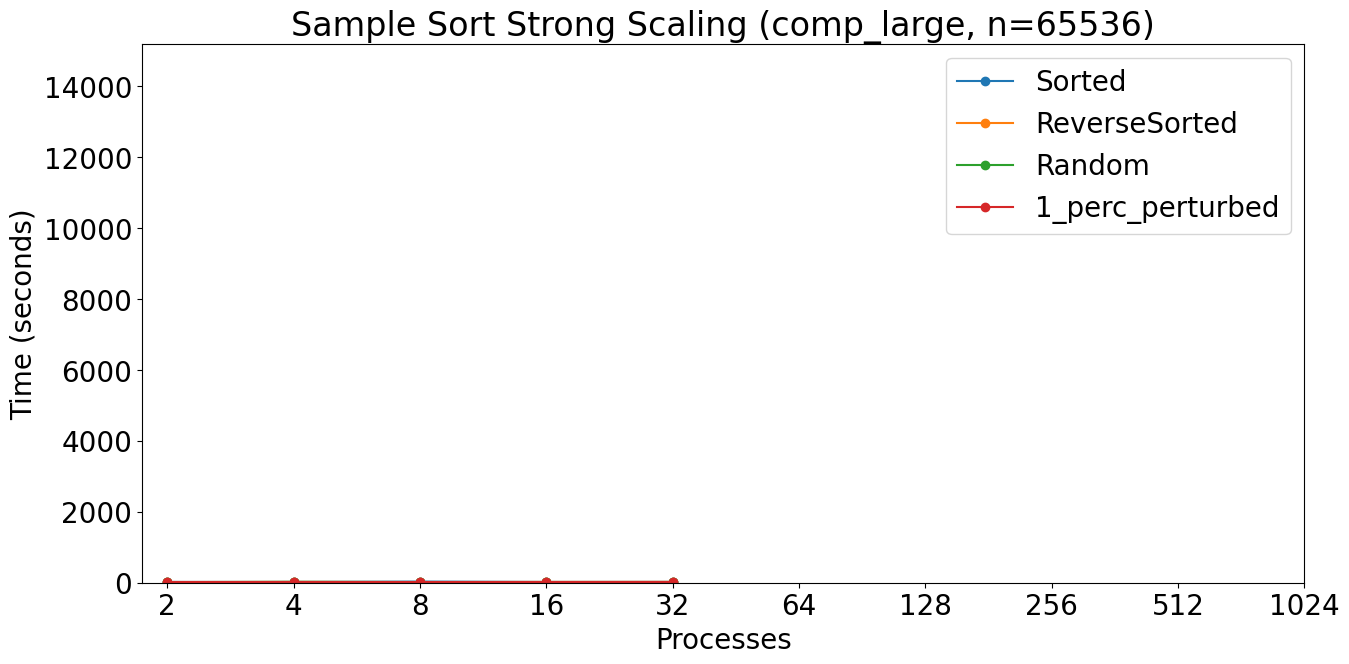

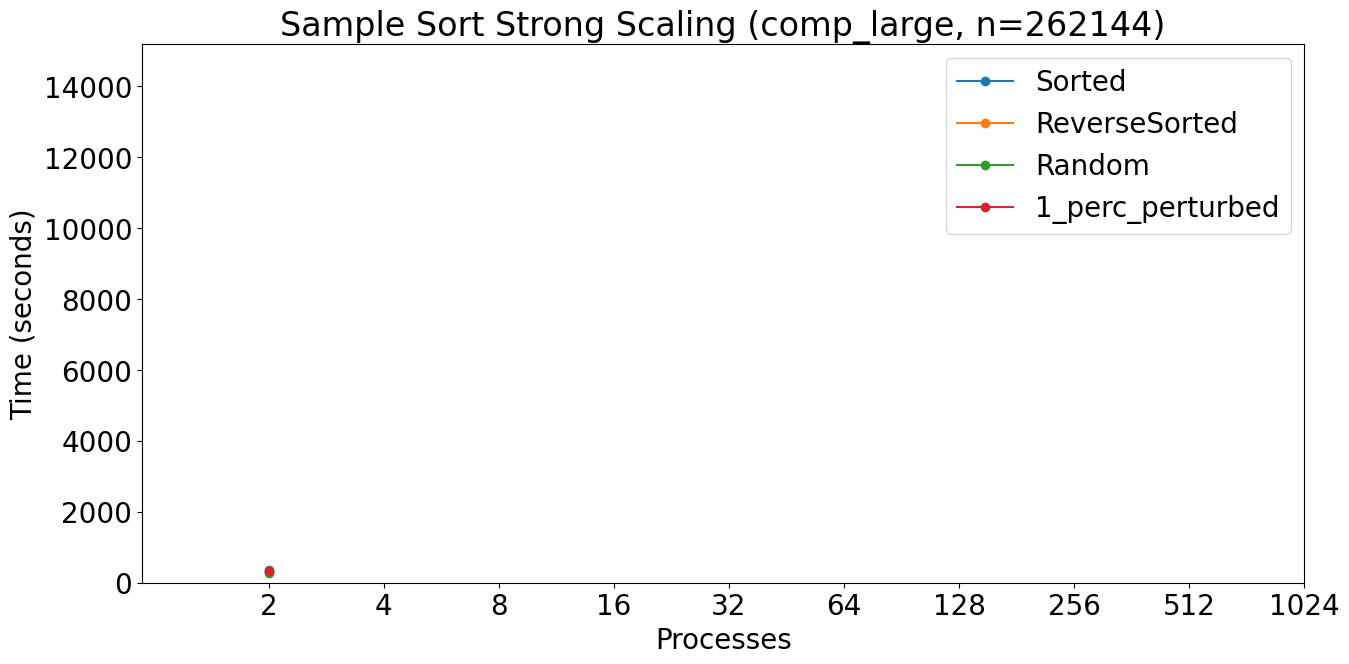

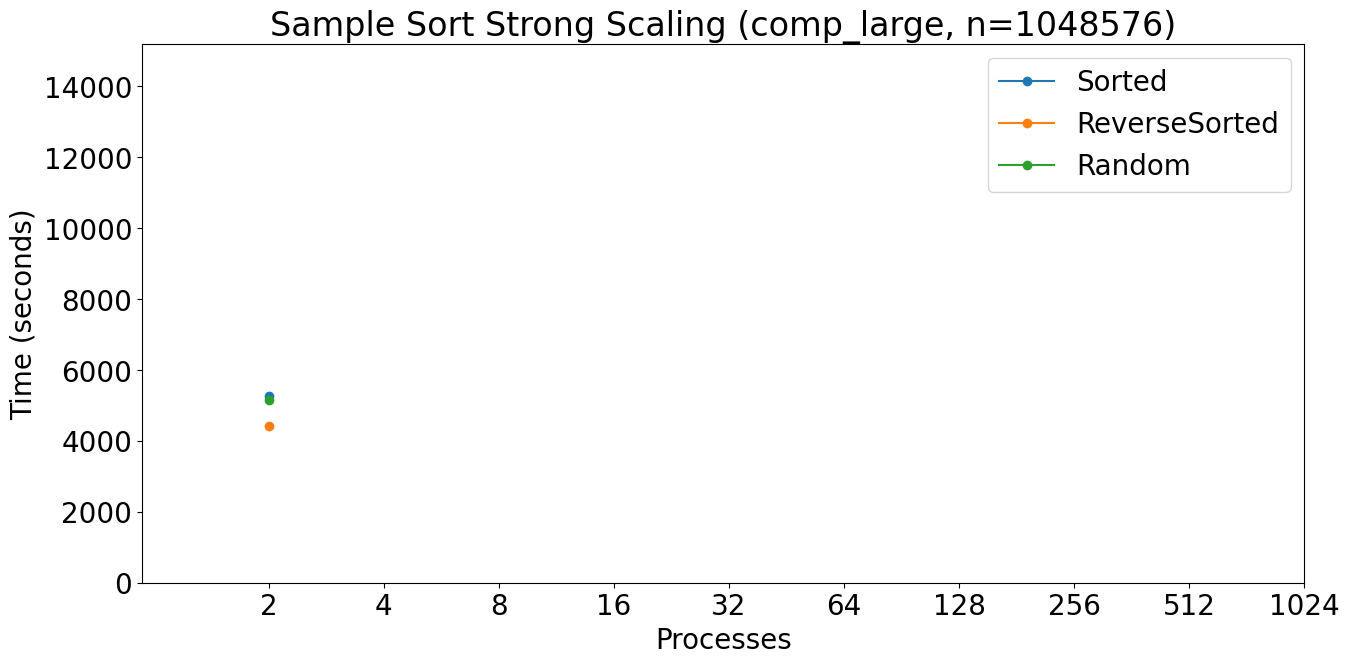

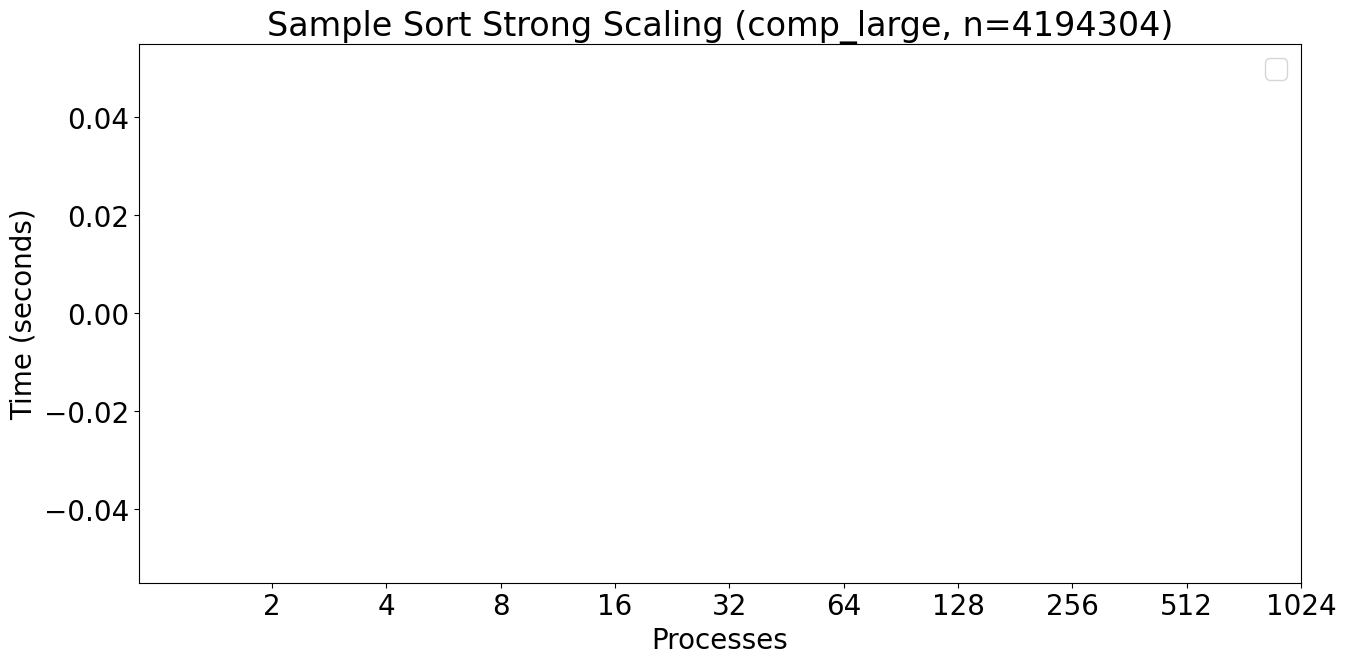

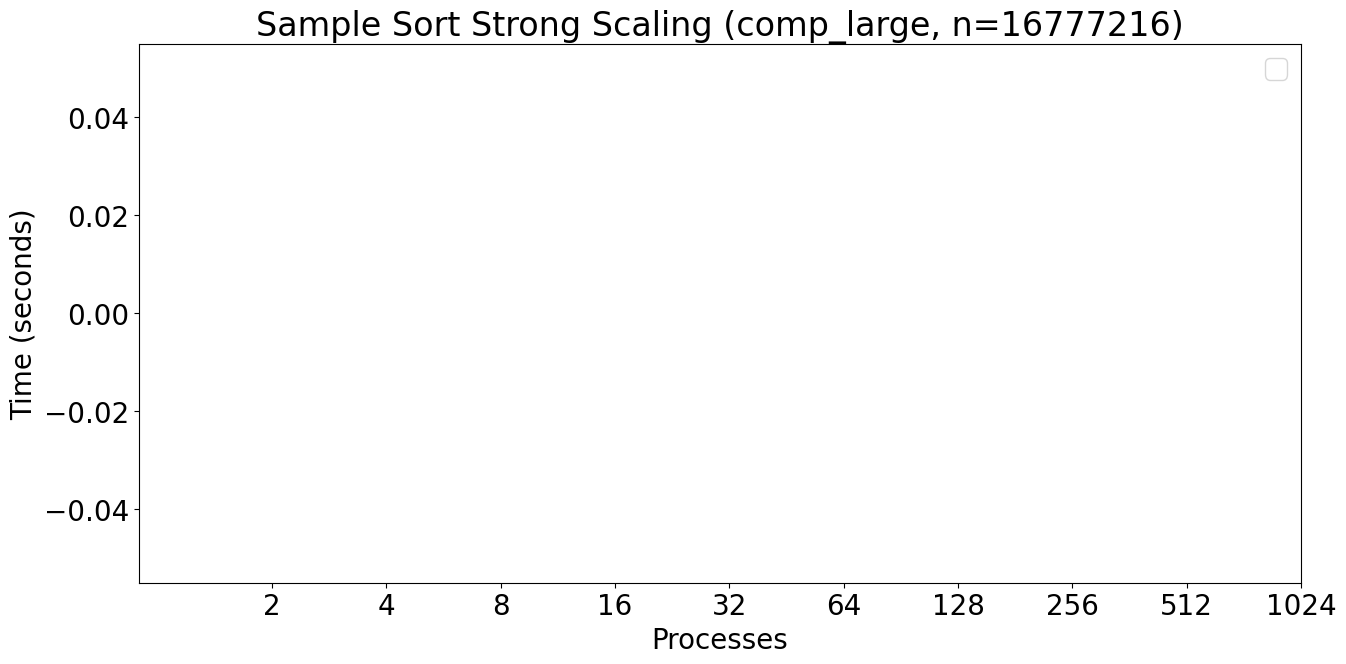

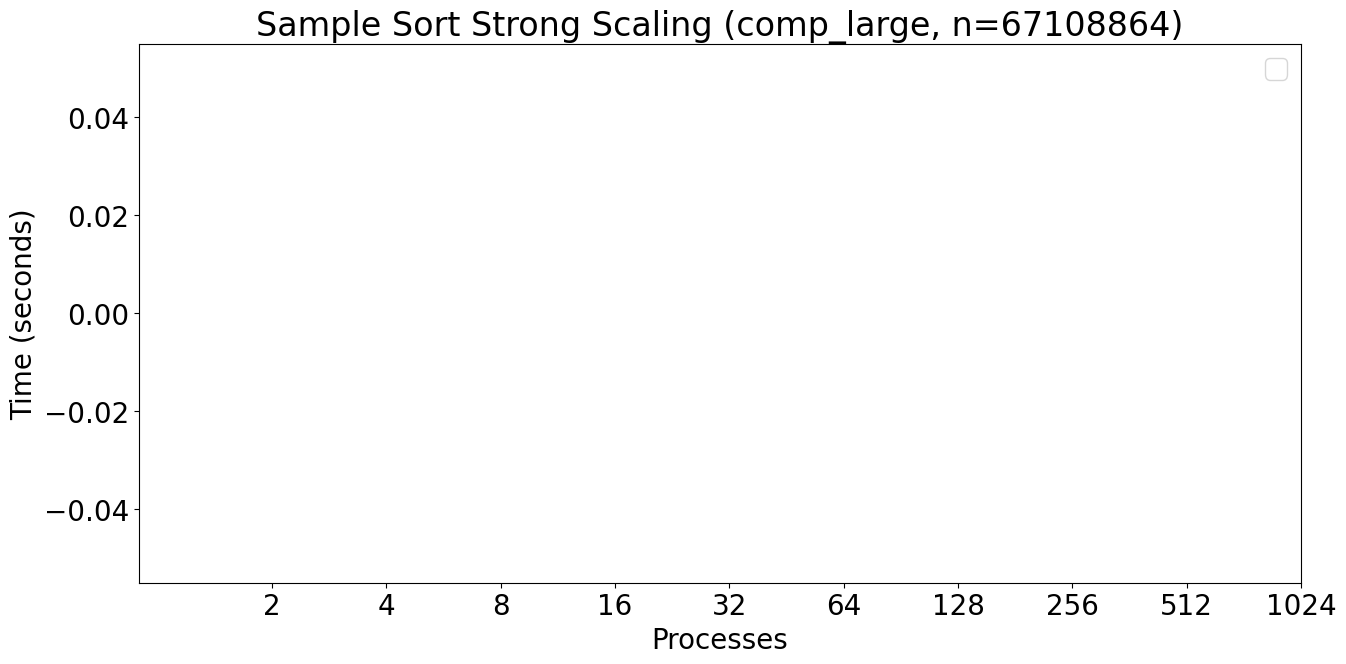

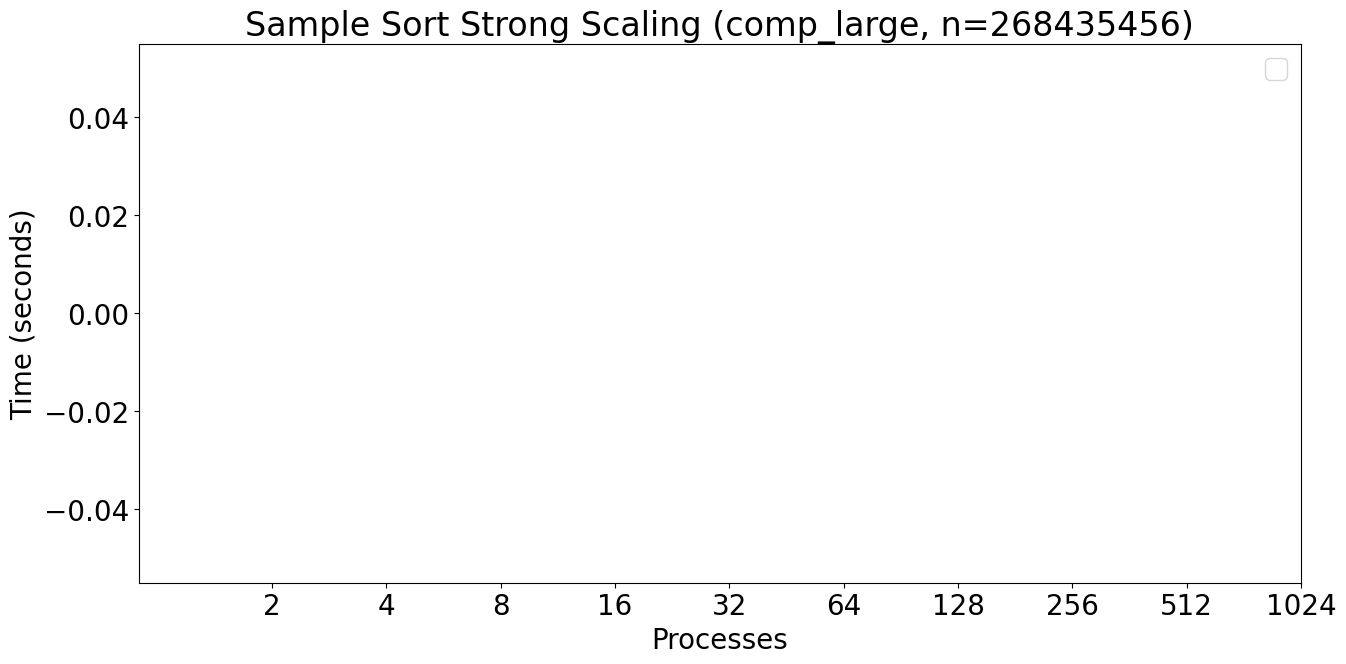

In [83]:
#iterate through nodes, and if comp_large, comm, or main, print the strong scaling
title_template = "Sample Sort Strong Scaling ({}, n={})"
for node in tk['Random'].graph.traverse():

    if node.frame['name'] == 'main' or node.frame['name'] == 'comp_large' or node.frame['name'] == 'comm':
        # for input size n, plot 4 plots for each input_type
        for arySize in input_size:

            fig = plt.figure(figsize=(15,7))
            ax = fig.add_subplot(1, 1, 1)

            # title will be node.frame['name']_input_size
            title = title_template.format(node.frame['name'], arySize)

            for in_type in input_type:
                df = tk[in_type].dataframe.loc[node, 'Avg time/rank'] # get average time
                df = (df.loc[df.index.get_level_values('input_size') == arySize])
                #df = df.unstack(level="input_type")
                df = df.unstack(level="input_size")
                ax.plot(df, marker='o')

            if (ax.lines) :
              plt.ylim(0, 15200)

            show_mpl_plot(fig, ax, title, "Processes", "Time (seconds)", input_type)


### Strong Scaling Speedup for each input type
- For this, we will do fixed size speedup for the $S_p =\frac{T_2}{T_p}$ for each input_type given problem size $2^{26}$.

main


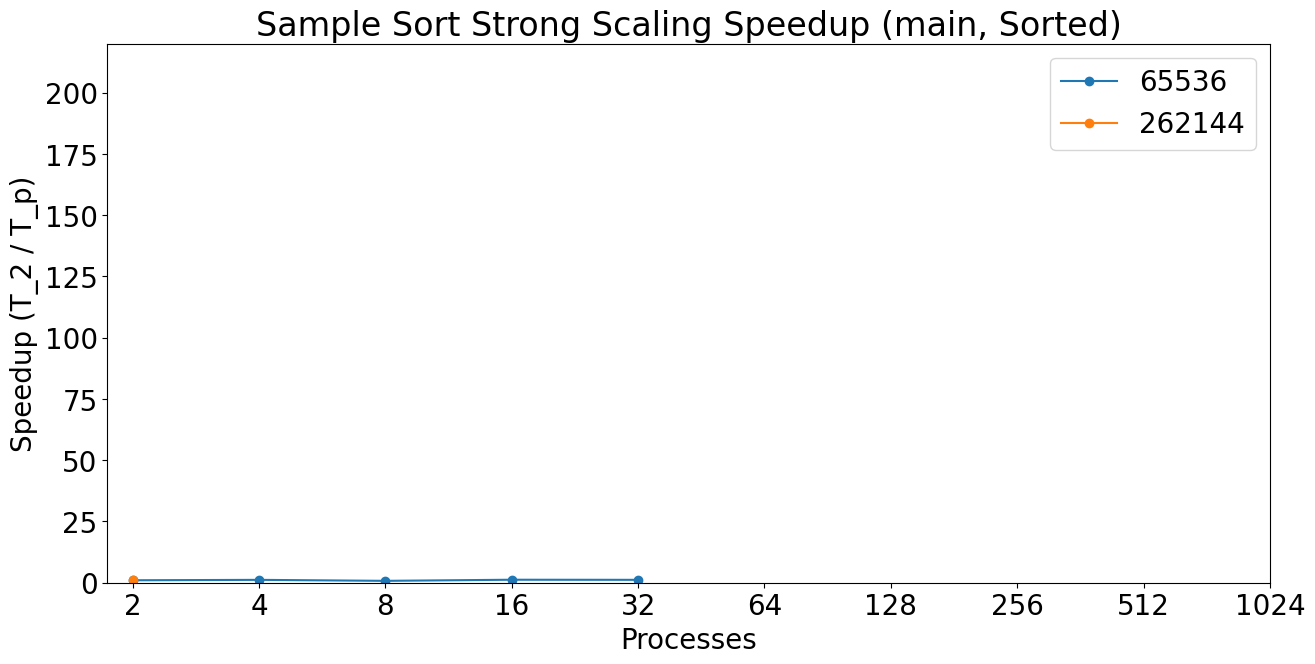

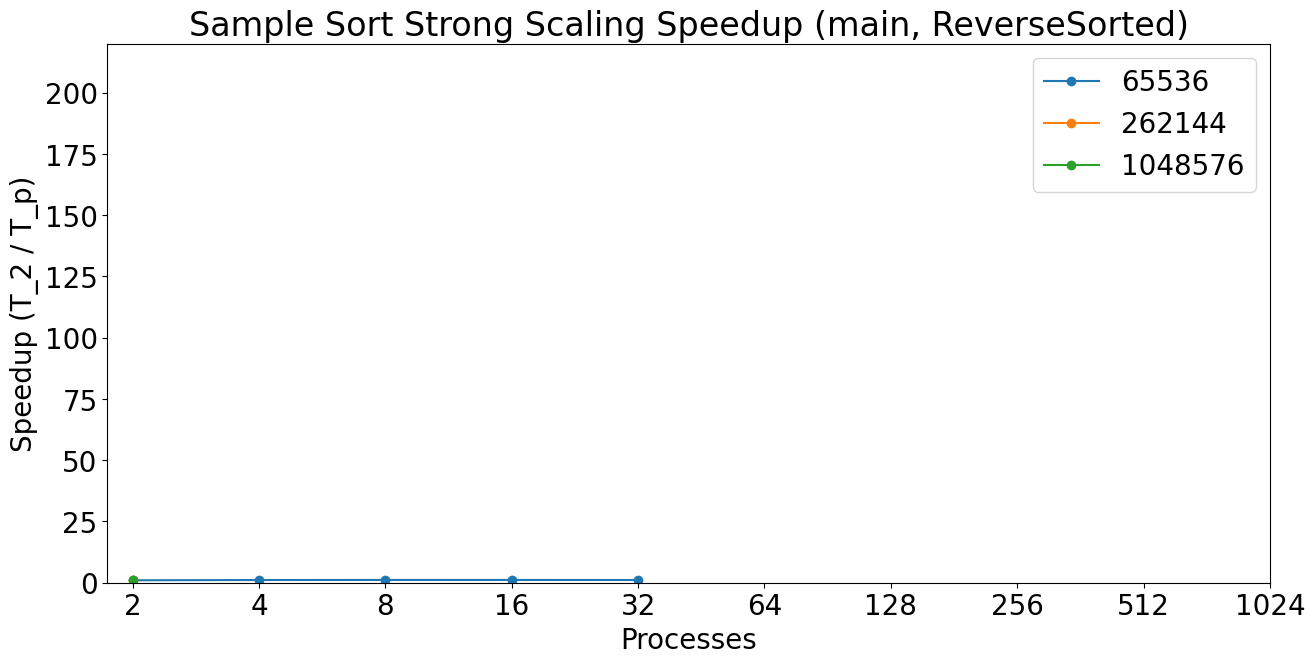

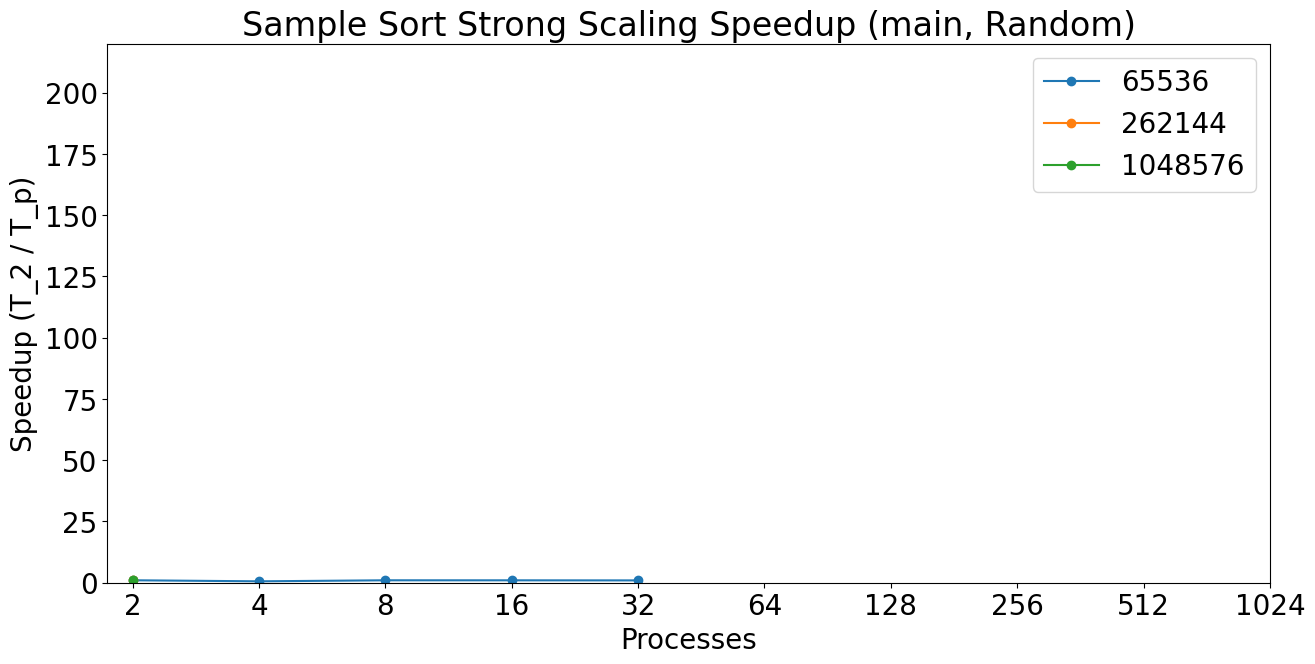

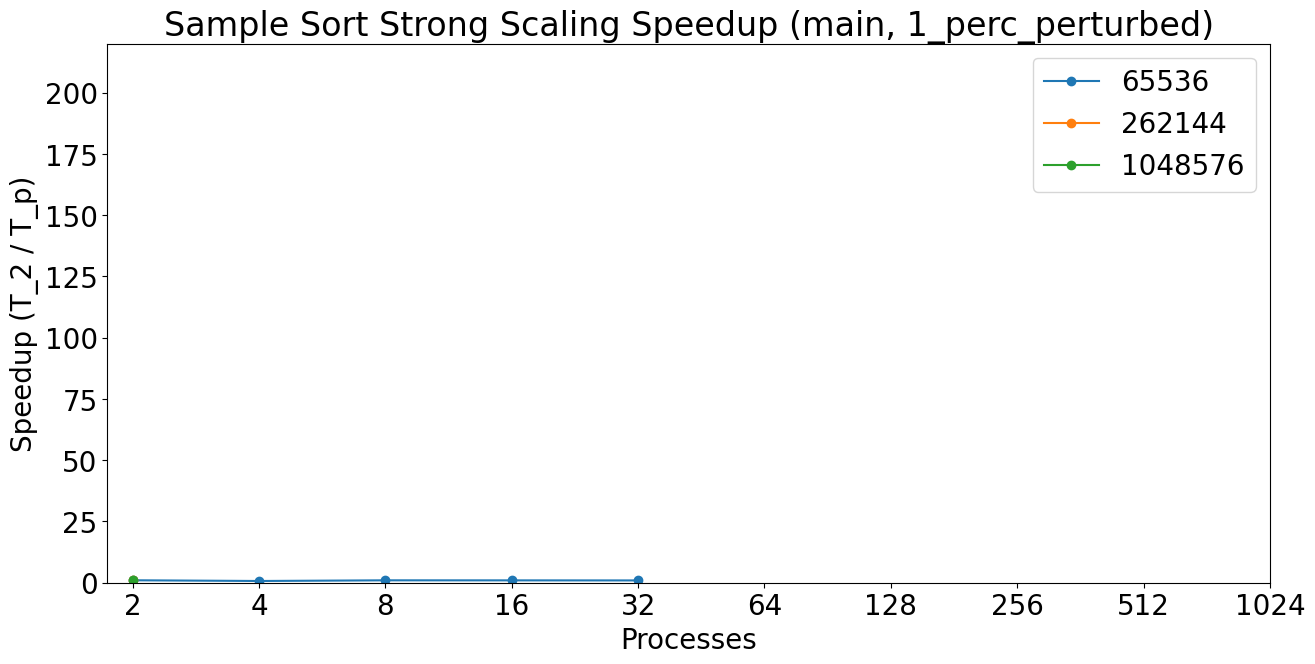

comm


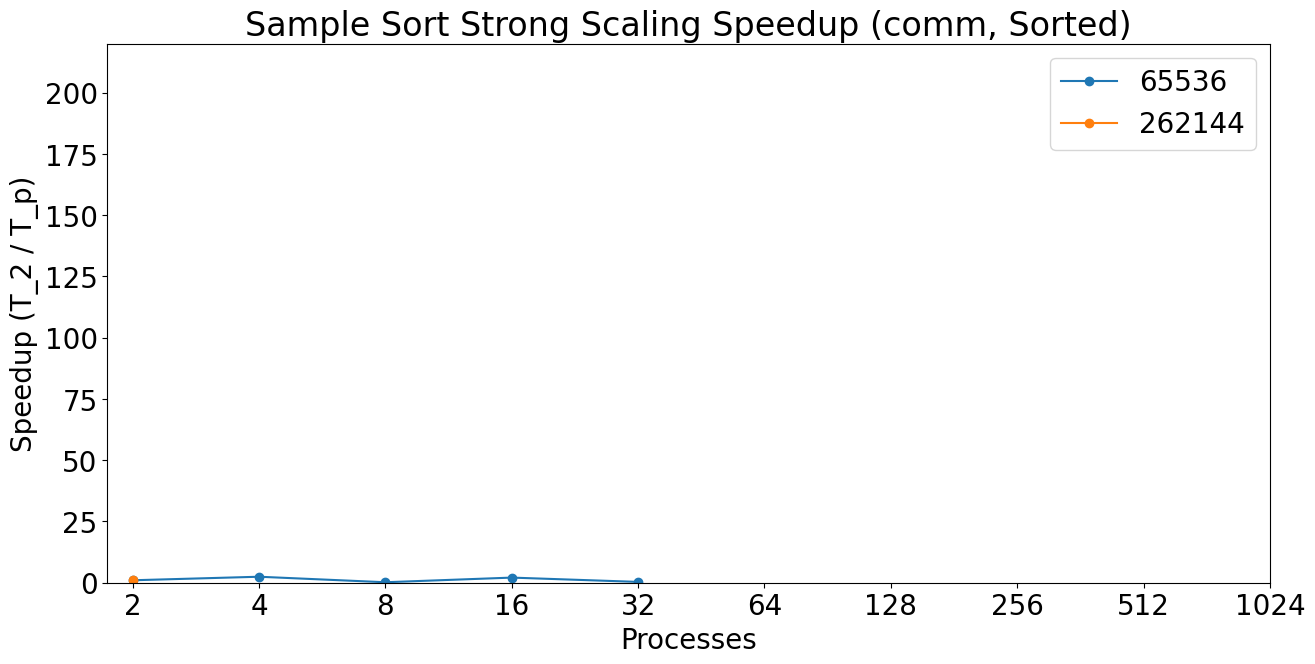

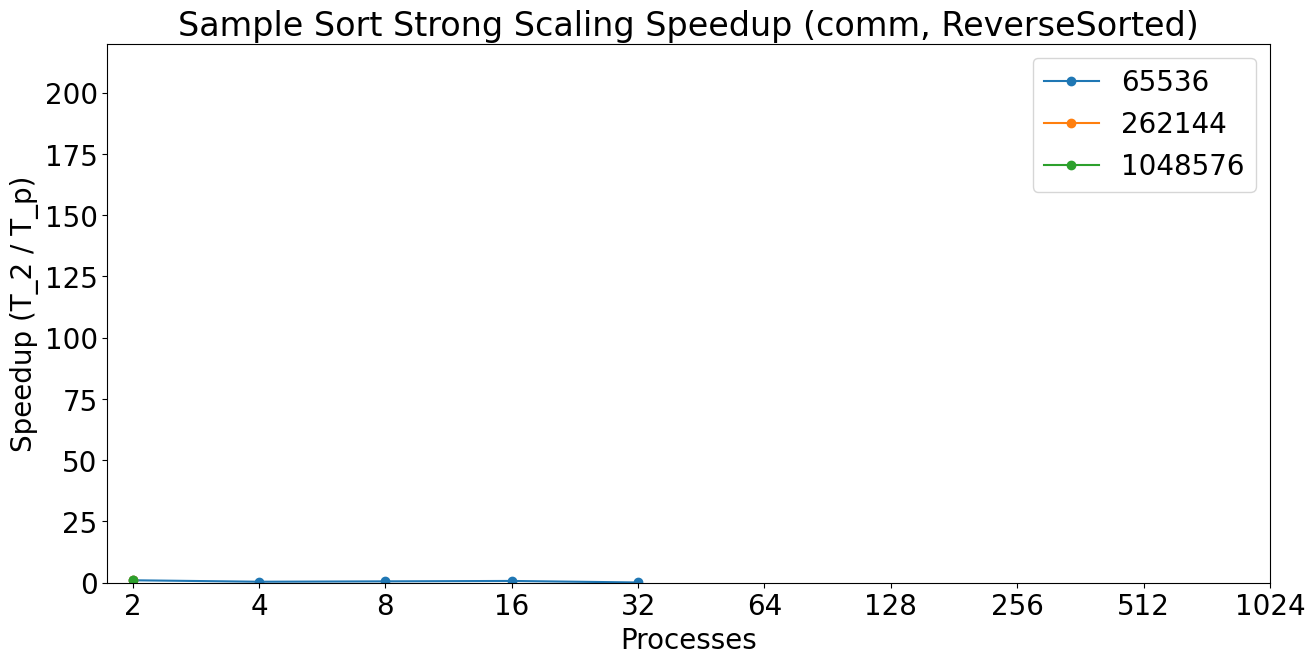

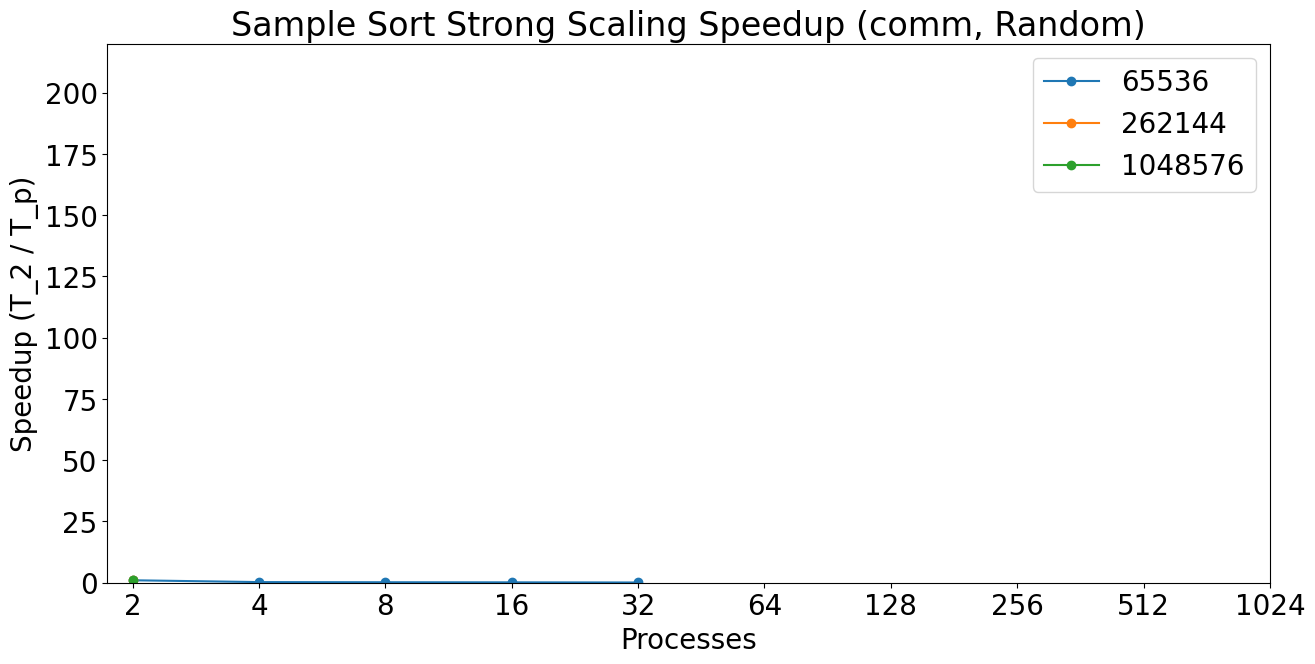

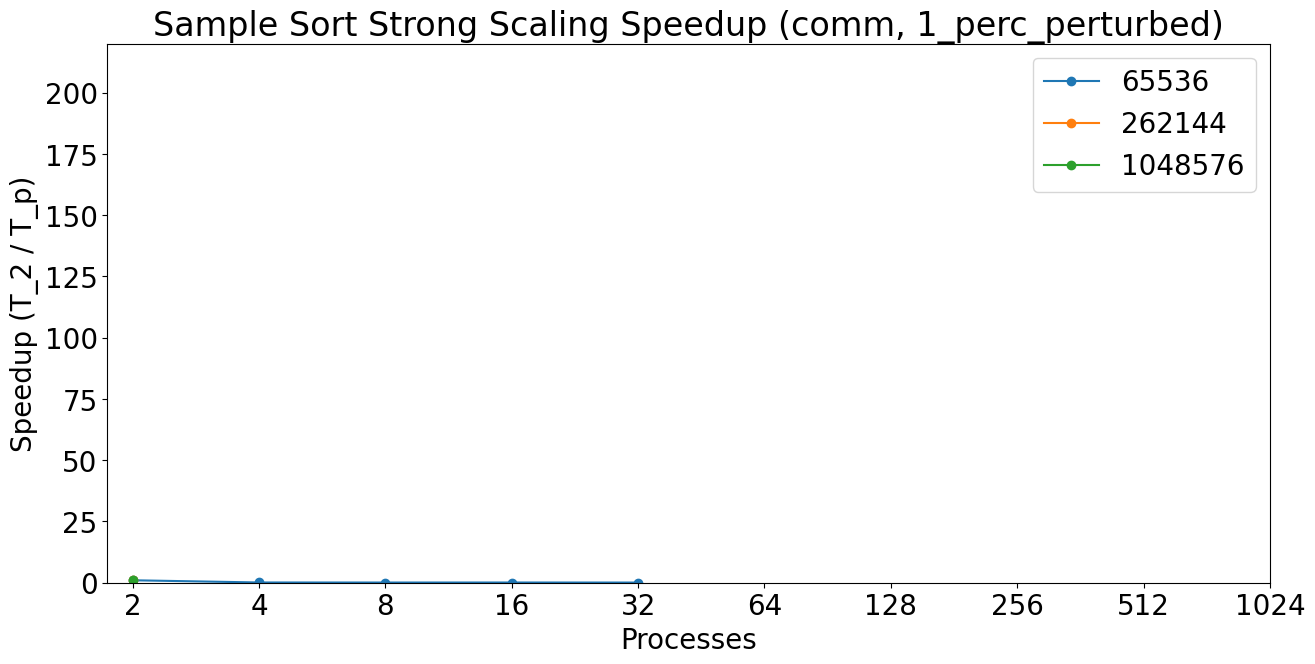

comp_large


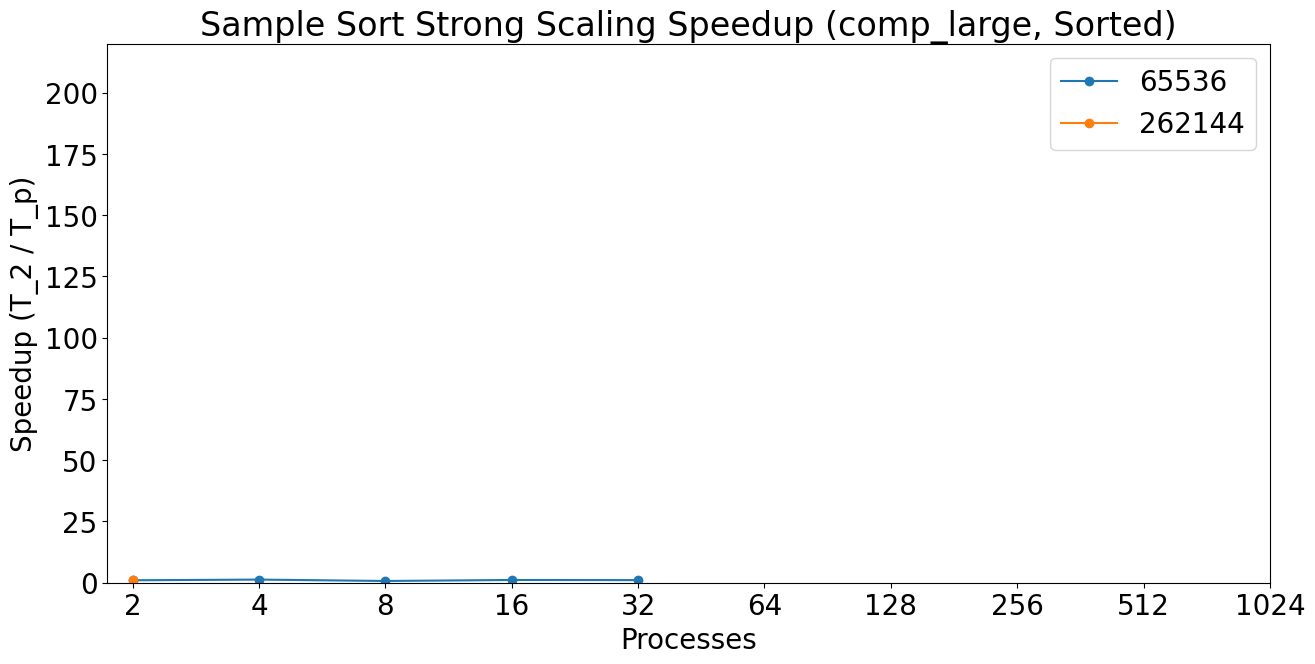

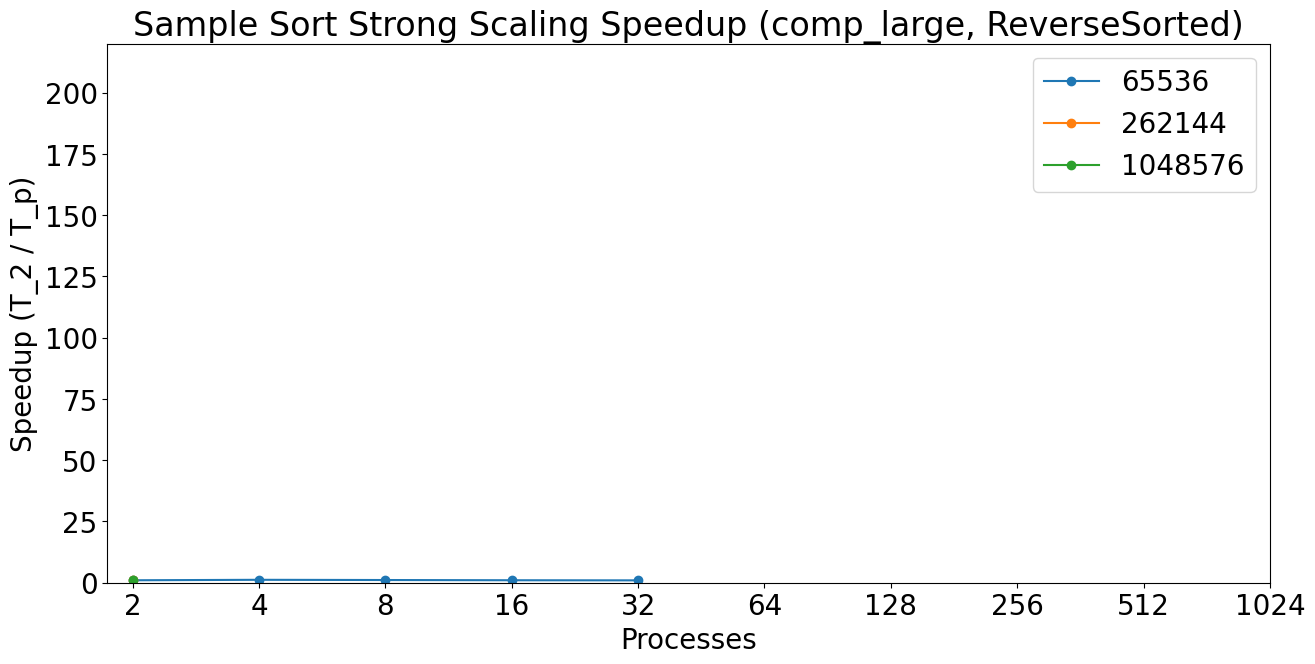

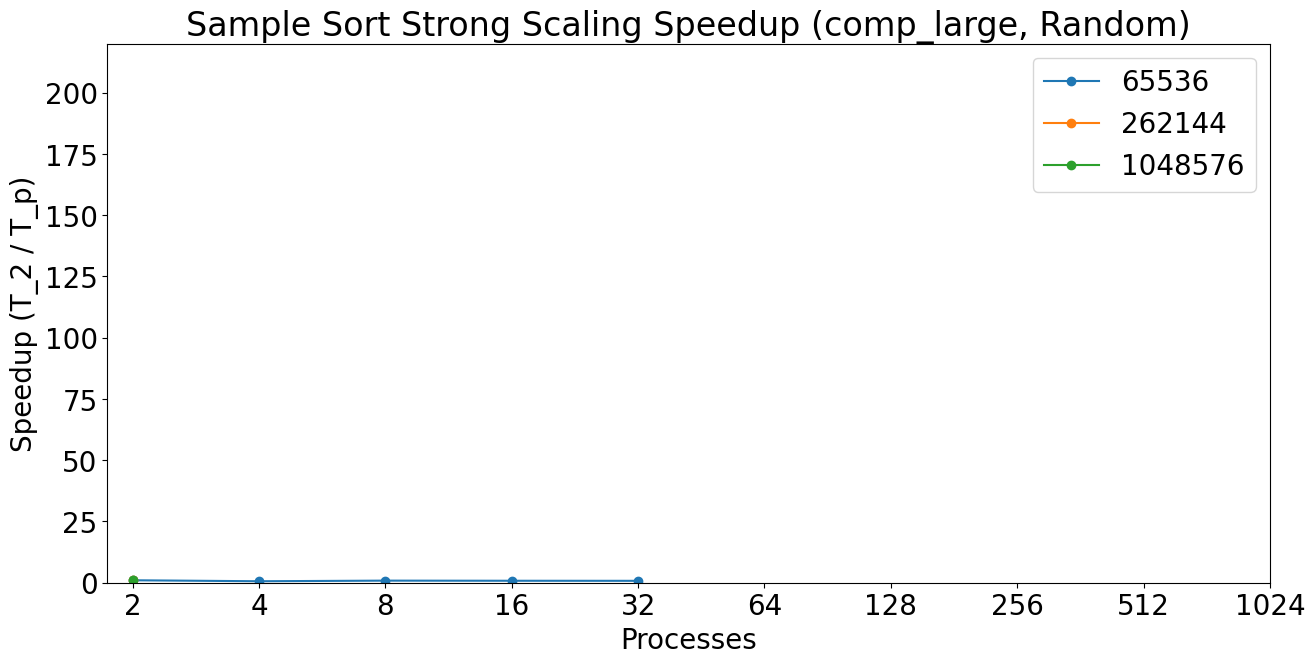

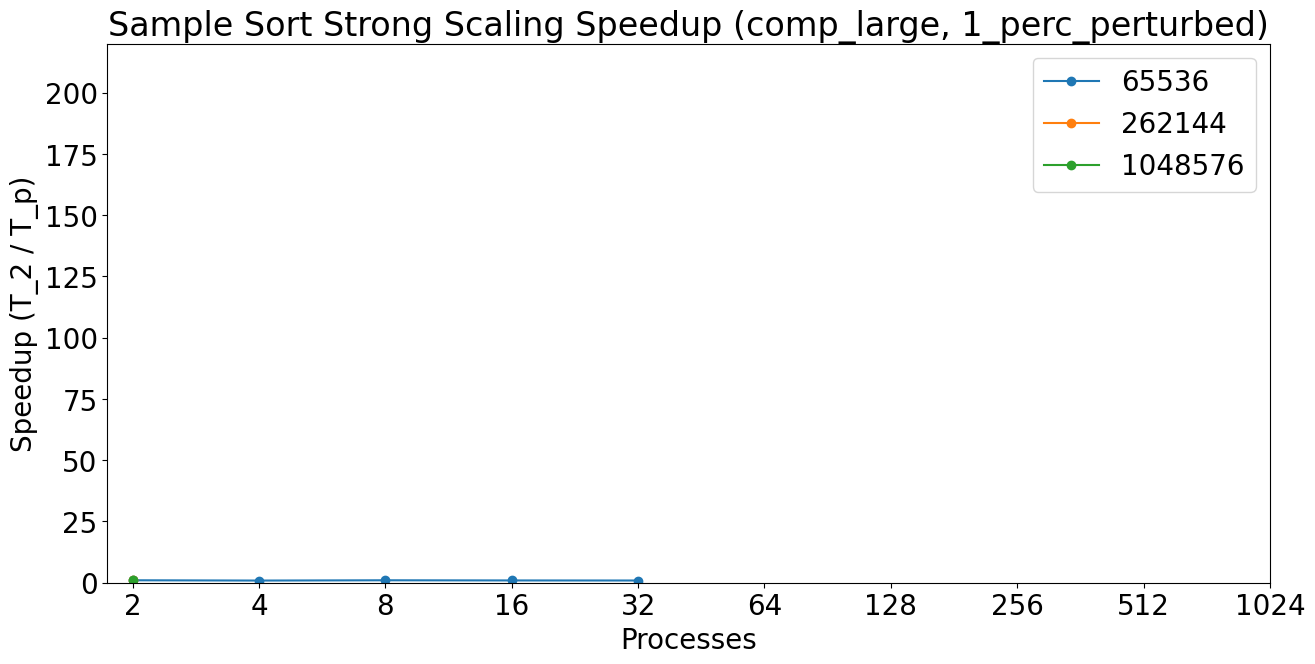

In [84]:
#iterate through nodes, and if comp_large, comm, or main, print the strong scaling
title_template0 = "Sample Sort Strong Scaling Speedup ({}, {})"

for node in tk['Random'].graph.traverse():
    if node.frame['name'] == 'main' or node.frame['name'] == 'comp_large' or node.frame['name'] == 'comm':
        # for input size n, plot 4 plots for each input_type
        print(node.frame['name'])
        for itype in input_type:
            # title will be node.frame['name']_input_size
            title = title_template0.format(node.frame['name'], itype)
            df = tk[itype].dataframe.loc[node, 'Avg time/rank'] # get average time
            #df = (df.loc[df.index.get_level_values('input_type') == itype])
            df = (df.loc[df.index.get_level_values('num_procs') >= 2])
            #df = (df.loc[df.index.get_level_values('num_procs') < 1024])
            df = df.unstack(level="input_size")
            #df = df.unstack(level="input_type")
            twoProcTimes = (df.loc[df.index.get_level_values('num_procs') == 2].values)[0]

            for i in range(0,len(twoProcTimes)):
                twoProc = twoProcTimes[i]
                df[input_size[i]] = (df[input_size[i]] / twoProc)**-1

            if (ax.lines) :
              plt.ylim(0, 15200)

            plot_mpl(df, title, "Processes", "Speedup (T_2 / T_p)", input_size, 220)

### Weak Scaling plots for each input type
- Increasing the problem size and processors
- Following our original plan from report section 2c: n=2^20/p=4, n=2^22/p=16, n=2^24/p=64, n=2^26/p=256, n=2^28/p=1024.

/content/drive/MyDrive/Colab Notebooks/project1/cali/p2-a262144-sSorted-sampl1.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 21.93it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/MyDrive/Colab Notebooks/project1/cali/p8-a1048576-sSorted-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p32-a4194304-sSorted-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p128-a16777216-sSorted-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p512-a67108864-sSorted-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p2-a262144-sReverseSorted-sampl1.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 24.94it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/MyDrive/Colab Notebooks/project1/cali/p8-a1048576-sReverseSorted-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p32-a4194304-sReverseSorted-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p128-a16777216-sReverseSorted-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p512-a67108864-sReverseSorted-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p2-a262144-sRandom-sampl1.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 19.20it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/MyDrive/Colab Notebooks/project1/cali/p8-a1048576-sRandom-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p32-a4194304-sRandom-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p128-a16777216-sRandom-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p512-a67108864-sRandom-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p2-a262144-s1_perc_perturbed-sampl1.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 17.17it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


/content/drive/MyDrive/Colab Notebooks/project1/cali/p8-a1048576-s1_perc_perturbed-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p32-a4194304-s1_perc_perturbed-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p128-a16777216-s1_perc_perturbed-sampl1.cali
/content/drive/MyDrive/Colab Notebooks/project1/cali/p512-a67108864-s1_perc_perturbed-sampl1.cali


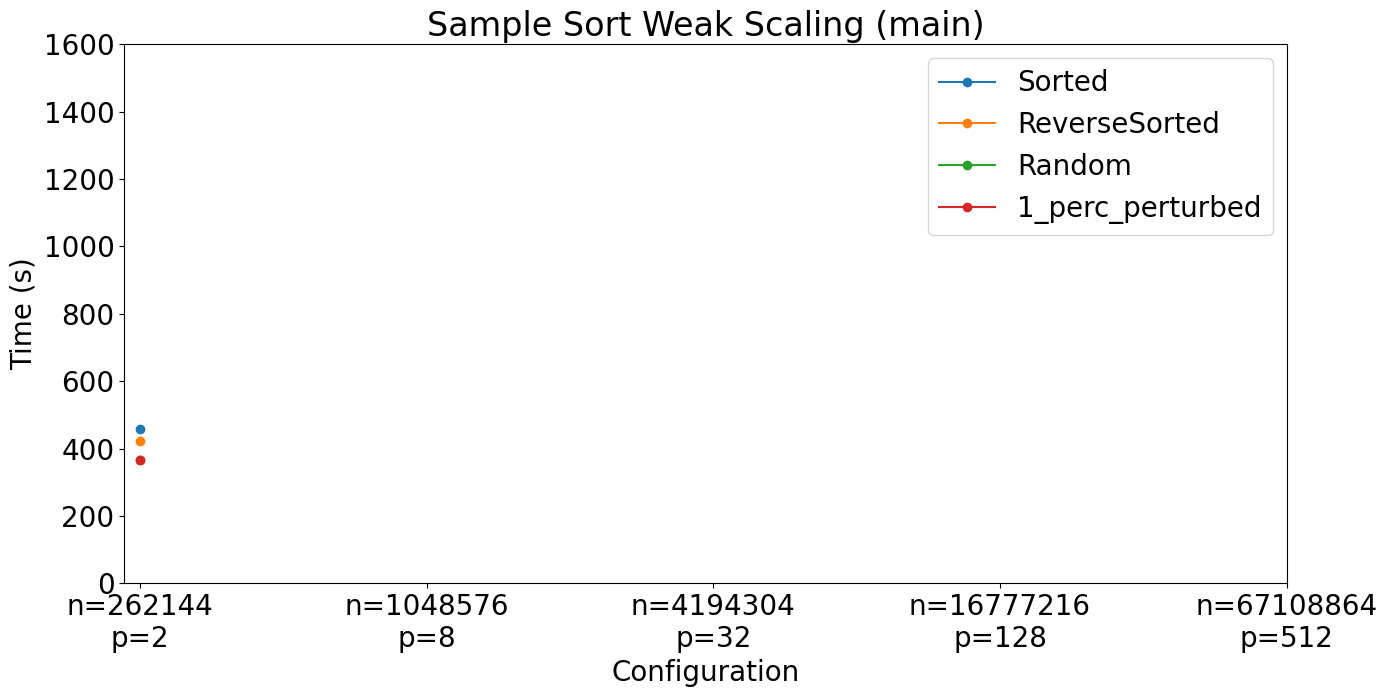

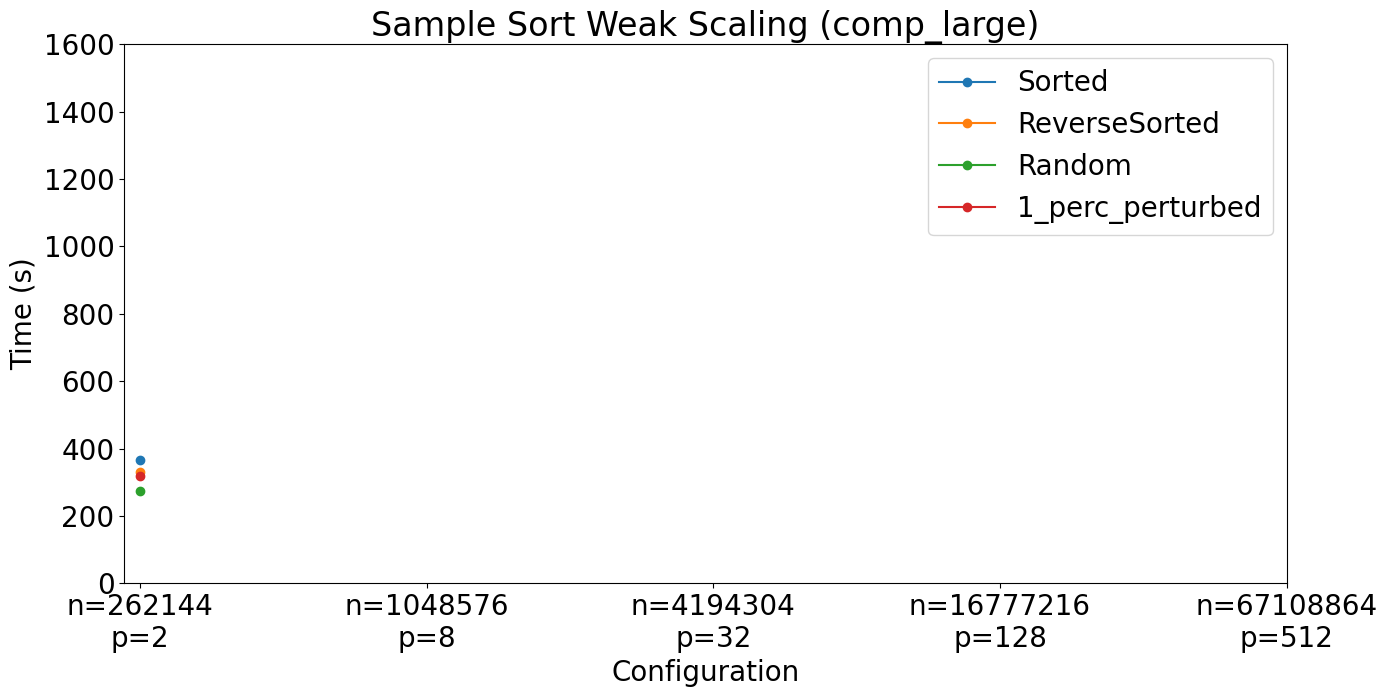

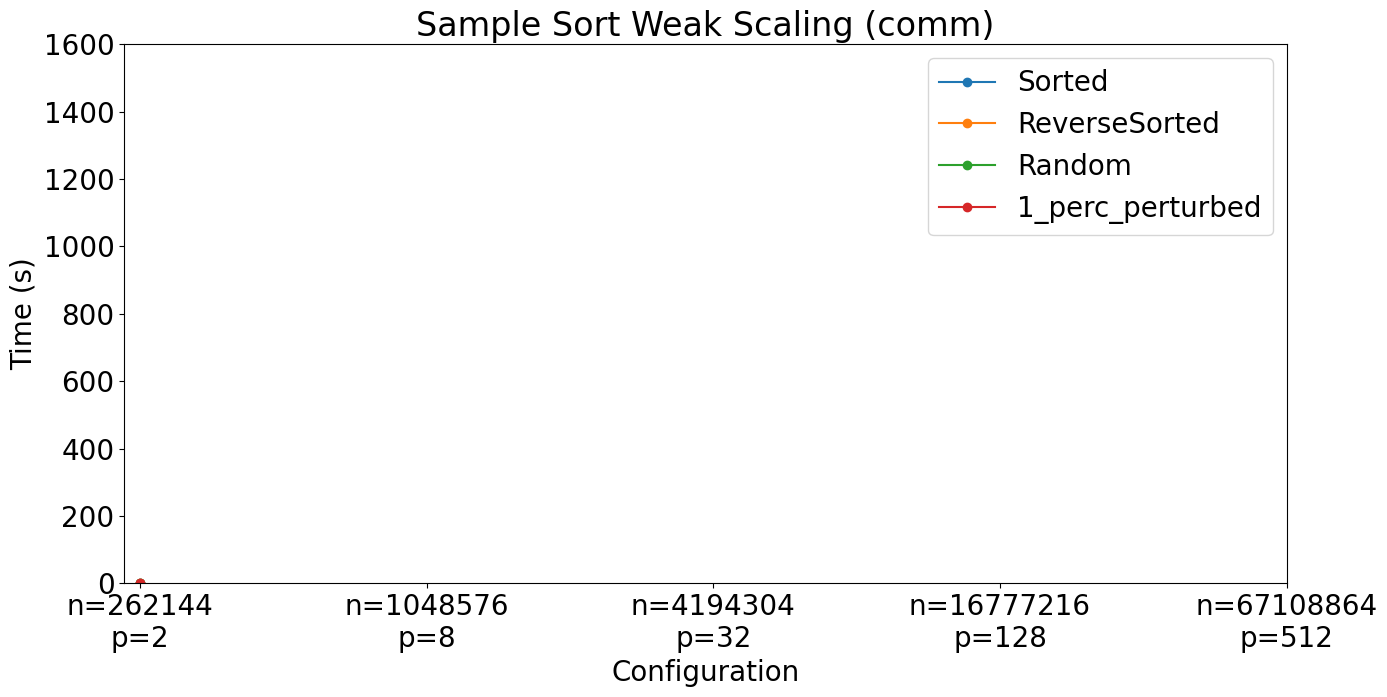

In [85]:
#iterate through nodes, and if comp_large, comm, or main, print the strong scaling
title_template0 = "Sample Sort Weak Scaling ({})"

np_pairs = [(2**20, 4), (2**22, 16), (2**24, 64), (2**26, 256), (2**28, 1024)]

# For use when 1024-processor runs are unavailable, for example because Grace broke.
# This can also be useful if an algorithm doesn't work with 2^28 array elements:
np_pairs_backup = [(2**18, 2), (2**20, 8), (2**22, 32), (2**24, 128), (2**26, 512)]
np_pairs = np_pairs_backup

x_labels = ['n={}\np={}'.format(n, p) for n, p in np_pairs]

data = {}
for itype in input_type:
    data[itype] = {region: [] for region in measurement_regions}

    for n, p in np_pairs:
        path = "/content/drive/MyDrive/Colab Notebooks/project1/cali/p{}-a{}-s{}-sampl1.cali".format(p, n, itype)
        print(path)

        if (os.path.isfile(path)) :
          tk_tmp = th.Thicket.from_caliperreader(glob(path))
          tk_tmp.metadata_column_to_perfdata("num_procs")
          tk_tmp.metadata_column_to_perfdata("input_size")
          for node in tk_tmp.graph.traverse():
              if (node.frame['name'] not in measurement_regions):
                  continue

              value = list(tk_tmp.dataframe.loc[node, 'Avg time/rank'])[0]
              #print(value)
              data[itype][node.frame['name']].append(value)

for region in measurement_regions:

    title = title_template0.format(region)

    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)

    for t in input_type:
        ax.plot(range(len(data[t][region])), data[t][region], label=t, marker='o')

    if (ax.lines) :
      plt.ylim(0, 1600)

    ax.set_title(title)
    ax.set_xlabel('Configuration')
    ax.set_ylabel('Time (s)')
    ax.legend()#legend)
    #plt.xscale("log", base=2)
    plt.xticks(range(len(np_pairs)))
    ax.set_xticklabels(x_labels)
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/project1/Sample_Plots/{title}')
    plt.show()